In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as r
from datetime import datetime
from scipy import stats

## 2016 Polling Data(Trump vs Clinton)

In [2]:
#Loading the 2016 Polling Data
data_2016 = pd.read_csv('D:\\SLIIT\\3rd year 2nd sem\\Machine Learning amd Optimization Methods\\Coding\\presidential_polls.csv')
data_2016.head(10)

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/25/2016,10/31/2016,Google Consumer Surveys,B,...,42.64140,40.86509,5.675099,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,47940,74999,11/1/16,15:09:38 1 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/27/2016,10/30/2016,ABC News/Washington Post,A+,...,43.29659,44.72984,3.401513,NaN,NaN,http://www.langerresearch.com/wp-content/uploa...,47881,74936,11/1/16,15:09:38 1 Nov 2016
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Virginia,10/27/2016,10/30/2016,ABC News/Washington Post,A+,...,46.29779,40.72604,6.401513,NaN,NaN,https://www.washingtonpost.com/local/virginia-...,47880,74934,11/1/16,15:09:38 1 Nov 2016
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Florida,10/20/2016,10/24/2016,SurveyUSA,A,...,46.35931,45.30585,1.777730,NaN,NaN,http://www.baynews9.com/content/news/baynews9/...,47465,74252,10/25/16,15:09:38 1 Nov 2016
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/20/2016,10/25/2016,Pew Research Center,B+,...,45.32744,42.20888,3.618320,NaN,NaN,http://www.people-press.org/2016/10/27/as-elec...,47616,74519,10/27/16,15:09:38 1 Nov 2016
5,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/22/2016,10/25/2016,Fox News/Anderson Robbins Research/Shaw & Comp...,A,...,44.65080,42.26663,6.114222,NaN,NaN,http://www.foxnews.com/politics/interactive/20...,47542,74365,10/26/16,15:09:38 1 Nov 2016
6,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/26/2016,10/31/2016,IBD/TIPP,A-,...,46.21834,43.56017,3.153590,NaN,NaN,http://www.investors.com/politics/ibd-tipp-pre...,47875,74925,11/1/16,15:09:38 1 Nov 2016
7,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Pennsylvania,10/25/2016,10/30/2016,Gravis Marketing,B-,...,46.89049,43.50333,3.466432,NaN,NaN,http://www.breitbart.com/2016-presidential-rac...,47867,74909,10/31/16,15:09:38 1 Nov 2016
8,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/23/2016,10/27/2016,Ipsos,A-,...,41.22576,37.24948,6.420006,NaN,NaN,http://polling.reuters.com/#poll/TM651Y15_26/f...,47643,74599,10/28/16,15:09:38 1 Nov 2016
9,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/29/2016,10/31/2016,The Times-Picayune/Lucid,NaN,...,42.21983,41.69540,4.220173,NaN,NaN,https://luc.id/2016-presidential-tracker/,47995,75055,11/1/16,15:09:38 1 Nov 2016


In [3]:
#Checking for unique values in the "cycle" column
data_2016['cycle'].unique()

array([2016], dtype=int64)

In [4]:
#Checking for unique values in the "branch" column
data_2016['branch'].unique()

array(['President'], dtype=object)

In [5]:
#Checking for unique values in the "type" column
data_2016['type'].unique()

array(['polls-plus', 'now-cast', 'polls-only'], dtype=object)

In [6]:
#Checking for unique values in the "matchup" column
data_2016['matchup'].unique()

array(['Clinton vs. Trump vs. Johnson'], dtype=object)

* The columns cycle, branch, and matchup columns were removed since they have only one unique value.


* The type column and the forecast date columns were removed because they are not important for this analysis.

In [7]:
data_2016.columns

Index(['cycle', 'branch', 'type', 'matchup', 'forecastdate', 'state',
       'startdate', 'enddate', 'pollster', 'grade', 'samplesize', 'population',
       'poll_wt', 'rawpoll_clinton', 'rawpoll_trump', 'rawpoll_johnson',
       'rawpoll_mcmullin', 'adjpoll_clinton', 'adjpoll_trump',
       'adjpoll_johnson', 'adjpoll_mcmullin', 'multiversions', 'url',
       'poll_id', 'question_id', 'createddate', 'timestamp'],
      dtype='object')

In [8]:
data_2016['adjpoll_clinton'].isin([40.63694]).sum()

1

In [9]:
data_2016['adjpoll_trump'].isin([45.19826]).sum()

1

In [10]:
#Selecting only the necessary columns
data_2016 = data_2016[["state","startdate","enddate","pollster","grade","samplesize","population","adjpoll_clinton","adjpoll_trump"]]
trump_clinton = data_2016.rename(columns = {"startdate": "start_date", "enddate": "end_date", "grade":"fte_grade", "samplesize":"sample_size", "adjpoll_clinton":"Clinton", "adjpoll_trump":"Trump"})
trump_clinton['start_date'] = pd.to_datetime(trump_clinton['start_date'])
trump_clinton['end_date'] = pd.to_datetime(trump_clinton['end_date'])
trump_clinton = trump_clinton.sort_values(by=['end_date','start_date']) # arranging the polls from most to least recent
trump_clinton['dem_lead'] = trump_clinton['Clinton'] - trump_clinton['Trump'] #lead of the democratic candidate (negative if they are losing)

In [11]:
trump_clinton.head()

,state,start_date,end_date,pollster,fte_grade,sample_size,population,Clinton,Trump,dem_lead
3077,South Carolina,2015-11-07,2015-11-08,Public Policy Polling,B+,1290.0,v,40.63694,45.19826,-4.56132
6520,South Carolina,2015-11-07,2015-11-08,Public Policy Polling,B+,1290.0,v,40.48820,45.19637,-4.70817
9901,South Carolina,2015-11-07,2015-11-08,Public Policy Polling,B+,1290.0,v,40.69941,45.18212,-4.48271
3206,Virginia,2015-11-09,2015-11-13,Roanoke College,C+,555.0,rv,49.81532,36.21050,13.60482
6638,Virginia,2015-11-09,2015-11-13,Roanoke College,C+,555.0,rv,49.00173,37.02524,11.97649


In [12]:
trump_clinton.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10236 entries, 3077 to 6833
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   state        10236 non-null  object        
 1   start_date   10236 non-null  datetime64[ns]
 2   end_date     10236 non-null  datetime64[ns]
 3   pollster     10236 non-null  object        
 4   fte_grade    9102 non-null   object        
 5   sample_size  10233 non-null  float64       
 6   population   10236 non-null  object        
 7   Clinton      10236 non-null  float64       
 8   Trump        10236 non-null  float64       
 9   dem_lead     10236 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 879.7+ KB


## 2020 Polling Data

In [13]:
data_2020 = pd.read_csv('D:\\SLIIT\\3rd year 2nd sem\\Machine Learning amd Optimization Methods\\Coding\\president_polls_1.csv')
data_2020.head()

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,methodology,...,election_date,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,party,answer,candidate_id,candidate_name,pct
0,82306,1347,Cygnal Political,NaN,NaN,Cygnal,67,Cygnal,B+,Online,...,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,47.3
1,82306,1347,Cygnal Political,NaN,NaN,Cygnal,67,Cygnal,B+,Online,...,11/5/24,general,False,False,NaN,REP,Trump,16651,Donald Trump,45.0
2,82306,1347,Cygnal Political,NaN,NaN,Cygnal,67,Cygnal,B+,Online,...,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,46.0
3,82306,1347,Cygnal Political,NaN,NaN,Cygnal,67,Cygnal,B+,Online,...,11/5/24,general,False,False,NaN,REP,DeSantis,16646,Ron DeSantis,44.7
4,82306,1347,Cygnal Political,NaN,NaN,Cygnal,67,Cygnal,B+,Online,...,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,44.8


In [14]:
data_2020 = data_2020[["poll_id","start_date", "end_date", "state", "pollster", "fte_grade", "sample_size", "population", "answer", "pct"]]
data_2020.head()

,poll_id,start_date,end_date,state,pollster,fte_grade,sample_size,population,answer,pct
0,82306,2/24/23,2/27/23,NaN,Cygnal Political,B+,2424,lv,Biden,47.3
1,82306,2/24/23,2/27/23,NaN,Cygnal Political,B+,2424,lv,Trump,45.0
2,82306,2/24/23,2/27/23,NaN,Cygnal Political,B+,2424,lv,Biden,46.0
3,82306,2/24/23,2/27/23,NaN,Cygnal Political,B+,2424,lv,DeSantis,44.7
4,82306,2/24/23,2/27/23,NaN,Cygnal Political,B+,2424,lv,Biden,44.8


In [15]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   poll_id      1563 non-null   int64  
 1   start_date   1563 non-null   object 
 2   end_date     1563 non-null   object 
 3   state        408 non-null    object 
 4   pollster     1563 non-null   object 
 5   fte_grade    1419 non-null   object 
 6   sample_size  1563 non-null   int64  
 7   population   1563 non-null   object 
 8   answer       1563 non-null   object 
 9   pct          1563 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 122.2+ KB


In [16]:
data_2020['state'] = data_2020.state.fillna('US')

* This line of code fills in missing values in the "state" column of the "data_2020" dataframe with the string 'US'.


* The "fillna()" method is called on the "state" column of the "data_2020" dataframe, and the string 'US' is passed as an argument to the method. This replaces any missing values in the "state" column with 'US'.


* By doing this, the code ensures that there are no missing values in the "state" column of the "data_2020" dataframe, which can be important for data analysis and modeling.

In [17]:
data_2020.head()

,poll_id,start_date,end_date,state,pollster,fte_grade,sample_size,population,answer,pct
0,82306,2/24/23,2/27/23,US,Cygnal Political,B+,2424,lv,Biden,47.3
1,82306,2/24/23,2/27/23,US,Cygnal Political,B+,2424,lv,Trump,45.0
2,82306,2/24/23,2/27/23,US,Cygnal Political,B+,2424,lv,Biden,46.0
3,82306,2/24/23,2/27/23,US,Cygnal Political,B+,2424,lv,DeSantis,44.7
4,82306,2/24/23,2/27/23,US,Cygnal Political,B+,2424,lv,Biden,44.8


In [18]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   poll_id      1563 non-null   int64  
 1   start_date   1563 non-null   object 
 2   end_date     1563 non-null   object 
 3   state        1563 non-null   object 
 4   pollster     1563 non-null   object 
 5   fte_grade    1419 non-null   object 
 6   sample_size  1563 non-null   int64  
 7   population   1563 non-null   object 
 8   answer       1563 non-null   object 
 9   pct          1563 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 122.2+ KB


* We will have to clean this data by spreading the candidates into their own separate columns, and will also remove irrelevant candidates. First, it will be necessary to separate different individual matchups involving Trump into different data tables.

In [19]:
def trump_opponent(data_2020,opp):
    trump_vs = data_2020[(data_2020['answer'] == opp) | (data_2020['answer'] == 'Trump')]
    trump_vs = trump_vs.pivot_table(values='pct',index=['poll_id','start_date','end_date','state','pollster','fte_grade','sample_size','population'],columns='answer')
    trump_vs = trump_vs.dropna(axis=0,how='any')#Drops the Trump polls against any opponent that isn't our opp parameter
    trump_vs = trump_vs.reset_index().drop(columns=['poll_id'])
    trump_vs['start_date'] = pd.to_datetime(trump_vs['start_date'])
    trump_vs['end_date'] = pd.to_datetime(trump_vs['end_date'])
    trump_vs['dem_lead'] = trump_vs[opp] - trump_vs['Trump']
    trump_vs = trump_vs.sort_values(by=['end_date','start_date']) #Arranging the polls from most to least recent
    return trump_vs

### Trump vs Biden

In [20]:
trump_biden = trump_opponent(data_2020,'Biden')
trump_biden.head()

answer,start_date,end_date,state,pollster,fte_grade,sample_size,population,Biden,Trump,dem_lead
2,2021-04-12,2021-04-16,US,Ipsos,B-,1105,a,45.5,28.0,17.5
0,2021-04-21,2021-04-22,Missouri,Remington,B,933,lv,38.0,53.0,-15.0
4,2021-05-07,2021-05-10,New Hampshire,St. Anselm,A/B,1267,rv,51.0,43.0,8.0
1,2021-05-11,2021-05-13,US,YouGov,B+,1561,a,48.0,36.0,12.0
3,2021-05-24,2021-05-26,US,YouGov,B+,1588,a,46.0,36.0,10.0


### Trump vs Sanders

In [21]:
trump_sanders = trump_opponent(data_2020,'Sanders')
trump_sanders.head()

answer,start_date,end_date,state,pollster,fte_grade,sample_size,population,Sanders,Trump,dem_lead
0,2022-04-22,2022-04-25,US,Morning Consult,B,2004,rv,42.0,43.5,-1.5
1,2022-07-19,2022-07-20,US,Emerson College Polling Society,A-,1078,rv,40.4,45.3,-4.9


### Trump vs Warren

In [22]:
trump_warren = trump_opponent(data_2020,'Warren')
trump_warren.head()

answer,start_date,end_date,state,pollster,fte_grade,sample_size,population,Trump,Warren,dem_lead
0,2023-02-10,2023-02-11,US,PPP,A-,1056,rv,45.5,48.0,2.5


### Trump vs Buttigieg

In [23]:
trump_buttigieg = trump_opponent(data_2020,'Buttigieg')
trump_buttigieg.head()

answer,start_date,end_date,state,pollster,fte_grade,sample_size,population,Buttigieg,Trump,dem_lead
0,2021-11-30,2021-12-02,US,Harris Poll,B+,1989,rv,37.0,48.666667,-11.666667
1,2022-04-22,2022-04-26,US,McLaughlin,C/D,1000,lv,39.0,49.750000,-10.750000
2,2023-02-10,2023-02-11,US,PPP,A-,1056,rv,46.0,45.500000,0.500000


# 2016 Election Results

In [24]:
results_2016 = pd.read_csv('D:\\SLIIT\\3rd year 2nd sem\\Machine Learning amd Optimization Methods\\Coding\\2016_election_results.csv')
results_2016.head()

,Clinton,Trump,Rpt,State,Vote by county,Vote by town,Place
0,151581,130614,100,Alabama,Jefferson,NaN,Jefferson
1,68429,91087,100,Alabama,Mobile,NaN,Mobile
2,62435,89199,100,Alabama,Madison,NaN,Madison
3,22927,72846,100,Alabama,Shelby,NaN,Shelby
4,58669,33928,100,Alabama,Montgomery,NaN,Montgomery


In [25]:
results_2016 = results_2016.groupby("State").sum()[['Clinton','Trump']]
results_2016.loc['U.S.'] = [65853514,62984828] #Adding a row for the national result
results_2016['Clinton_pct'] = 100 * results_2016['Clinton'] / (results_2016['Clinton'] + results_2016['Trump'])
results_2016['Trump_pct'] = 100 * results_2016['Trump'] / (results_2016['Clinton'] + results_2016['Trump'])
results_2016['dem_lead'] = results_2016['Clinton_pct'] - results_2016['Trump_pct']
results_2016['index'] = list(range(0,50))
results_2016['state'] = results_2016.index
results_2016 = results_2016.set_index('index')
results_2016.head()

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\1666870148.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results_2016 = results_2016.groupby("State").sum()[['Clinton','Trump']]


,Clinton,Trump,Clinton_pct,Trump_pct,dem_lead,state
index,,,,,,
0,718084,1306925,35.460781,64.539219,-29.078439,Alabama
1,888374,972900,47.729351,52.270649,-4.541298,Arizona
2,378729,677904,35.843003,64.156997,-28.313994,Arkansas
3,5488776,2970470,64.884932,35.115068,29.769864,California
4,1208095,1136354,51.530018,48.469982,3.060037,Colorado


In [26]:
results_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Clinton      50 non-null     int64  
 1   Trump        50 non-null     int64  
 2   Clinton_pct  50 non-null     float64
 3   Trump_pct    50 non-null     float64
 4   dem_lead     50 non-null     float64
 5   state        50 non-null     object 
dtypes: float64(3), int64(2), object(1)
memory usage: 2.7+ KB


### What Happened in 2016? (The Polling Averages)

* This section will analyze both national and battleground state polls in 2016 by comparing them to the actual results to determine how we should treat the 2020 polls this far into the election cycle. We will compare the averages of all polls, historically reliable polls only, and polls of likely voters for each state.

In [27]:
def trump_vs_clinton(trump_clinton, state, results_2016, reliable = False, likely_voters = False):
    
    #getting polls for the specified state / U.S. and filtering if necessary
    match_up = trump_clinton
    match_up = match_up[match_up["state"] == state]
    
    if reliable == True:
        match_up = match_up[match_up["fte_grade"].isin(["A+", "A", "A-"])]
    if likely_voters == True:
        match_up = match_up[match_up["population"] == "lv"]
    
    #Accounting for repeated polls which have the same end date
    
    match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
    match_up.index = match_up["end_date"]
    
    #A rolling average of democrat lead/deficit in the past 14 days
    
    if state == "U.S.":
        match_up["average_lead"] = match_up["dem_lead"].rolling("14D", min_periods = 0).mean()
    else:
        match_up["average_lead"] = match_up["dem_lead"].rolling("30D", min_periods = 0).mean()
    
    #Plotting the time series
    
    polls_vs_final =  [match_up.iloc[-1]["average_lead"], results_2016[results_2016["state"] == state].iloc[0]["dem_lead"]]
    polls_df = pd.DataFrame(polls_vs_final)
    polls_df[1] = ["Final/Current Polling Average", "Actual Results"]
    
    plt.subplots(figsize = (9,6))
    plt.subplot(1,2,1)
    plt.plot(match_up["end_date"], match_up["average_lead"])
    plt.xlabel("Date")
    plt.xticks(rotation = 90)
    plt.ylabel("Lead or Deficit vs. Trump (%)")
    plt.title(f"Trump vs. Clinton in {state}")  
    plt.subplot(1,2,2)
    plt.bar(polls_df[1], polls_df[0])
    plt.xticks(rotation = 90)
    plt.title("Poll Accuracy Chart")
    plt.show()
    
    if reliable == True:
        return f"Percentage Points of Trump Underestimation in {state} From Historically Reliable Polls: {round(polls_vs_final[0] - polls_vs_final[1], 2)}%"
    if likely_voters == True:
        return f"Percentage Points of Trump Underestimation in {state} From Polls of Likely Voters: {round(polls_vs_final[0] - polls_vs_final[1], 2)}%"
    return f"Percentage Points of Trump Underestimation in {state} From All Polls: {round(polls_vs_final[0] - polls_vs_final[1], 2)}%"

* The **rolling()**  is used to calculate a rolling average of the Democrat's lead or deficit against Trump in the past 14 days (or 30 days for states other than the U.S.) based on the polling data in the "match_up" dataframe.


* The rolling() is used to perform rolling window calculations on time-series or sequence data. In this case, the "rolling()" method is called on the "dem_lead" column of the "match_up" dataframe, which contains the percentage point difference between the percentage of voters who support the Democratic candidate and the percentage of voters who support the Republican candidate (in this case, Trump) in each poll.


* The rolling() takes a window size as its argument, which determines the number of data points to use for the rolling calculation. In this case, a rolling window of 14 days is used for the U.S. and a rolling window of 30 days is used for other states.


* By applying the rolling() to the "dem_lead" column with the specified window size, the function is able to calculate the rolling average of the Democrat's lead or deficit against Trump over time, providing a more stable and informative representation of the polling data.

### Nationally

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


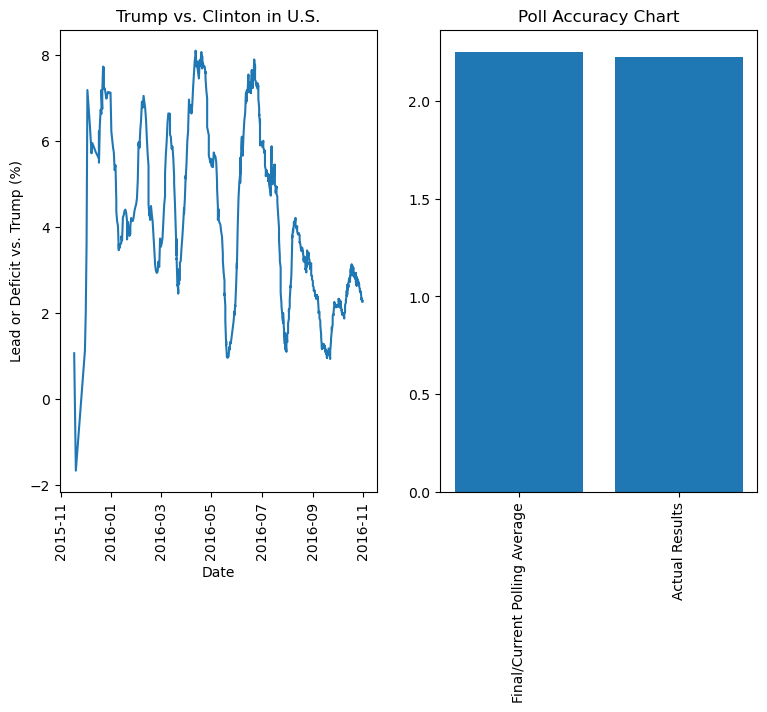

'Percentage Points of Trump Underestimation in U.S. From All Polls: 0.03%'

In [28]:
trump_vs_clinton(trump_clinton,'U.S.',results_2016)

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


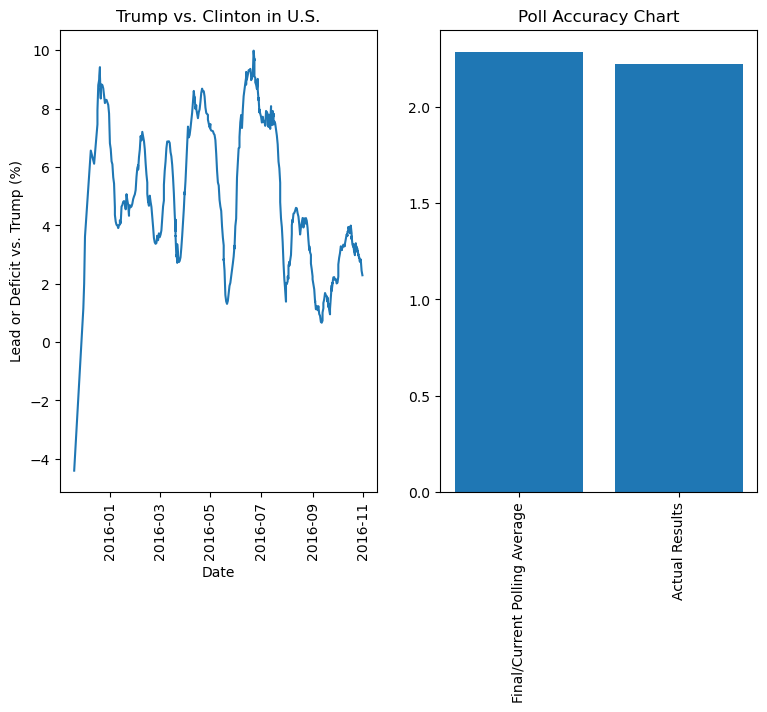

'Percentage Points of Trump Underestimation in U.S. From Historically Reliable Polls: 0.06%'

In [29]:
trump_vs_clinton(trump_clinton,'U.S.',results_2016,reliable=True)

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


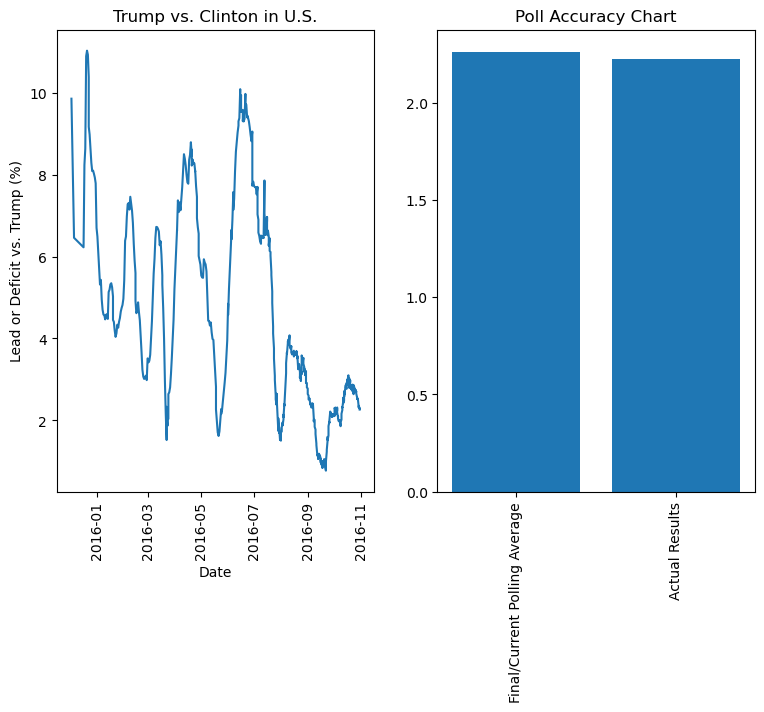

'Percentage Points of Trump Underestimation in U.S. From Polls of Likely Voters: 0.04%'

In [30]:
trump_vs_clinton(trump_clinton,'U.S.',results_2016,likely_voters=True)

* In 2016, the national polling was right on the money, as the average of all polls the last two weeks before election day only underestimated Trump's chances by 0.03%. We can also see that the time of the election was the time of one of Clinton's weakest leads at just over 2%.


* Of course, the US presidential election is decided by the electoral college, not the national popular vote, so it would be helpful to look at battleground states (states that may go either way and decide the election) and other states where Trump performed better than expected.

### Florida

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


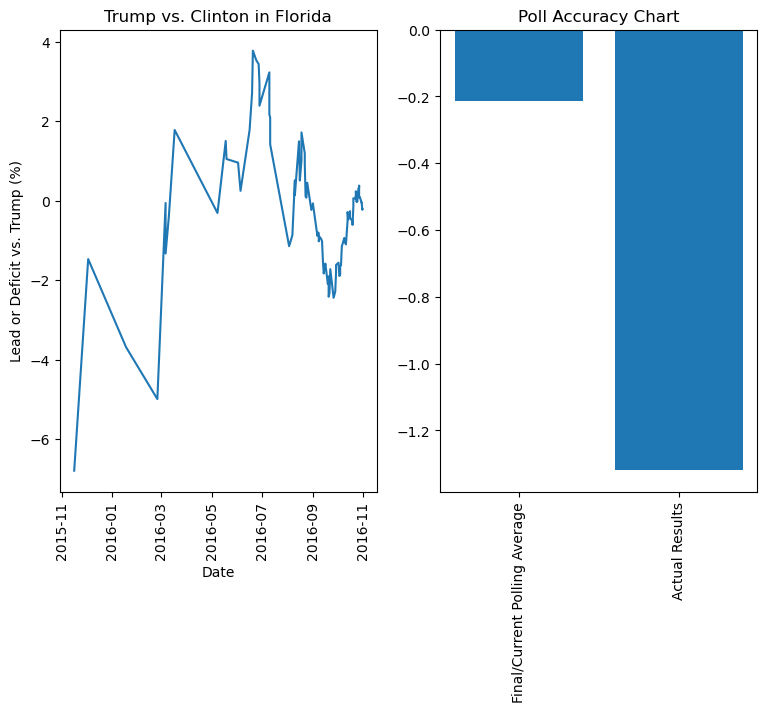

'Percentage Points of Trump Underestimation in Florida From All Polls: 1.1%'

In [31]:
trump_vs_clinton(trump_clinton,'Florida',results_2016)

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


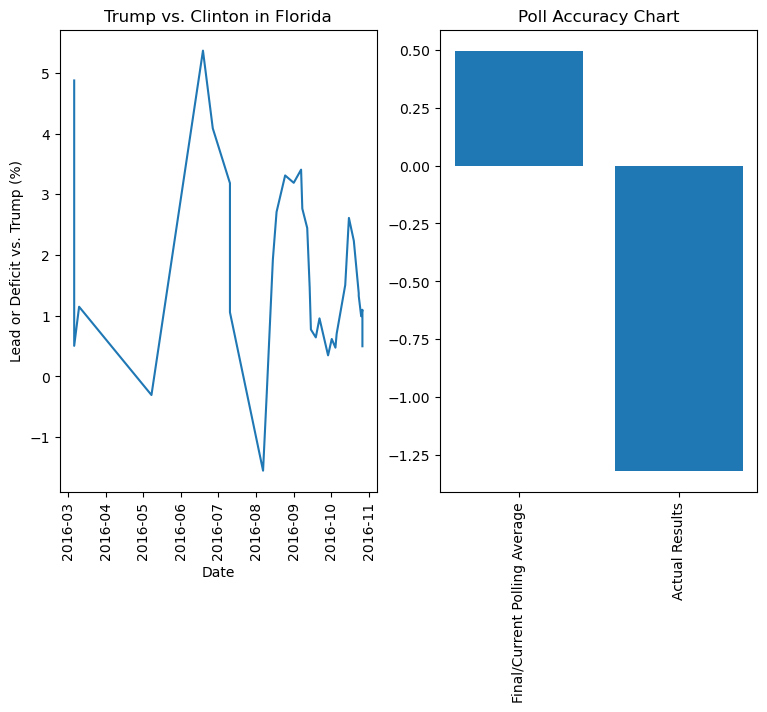

'Percentage Points of Trump Underestimation in Florida From Historically Reliable Polls: 1.81%'

In [32]:
trump_vs_clinton(trump_clinton,'Florida',results_2016,reliable=True)

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


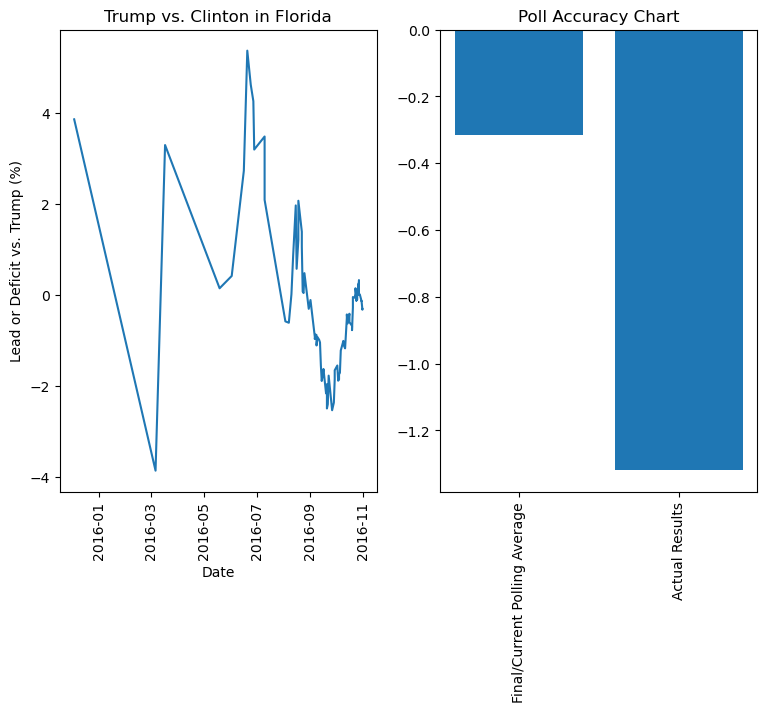

'Percentage Points of Trump Underestimation in Florida From Polls of Likely Voters: 1.0%'

In [33]:
trump_vs_clinton(trump_clinton,'Florida',results_2016,likely_voters=True)

* The polling averages only barely underestimated Trump's chances in Florida, with historically reliable polls being least accurate by a slight margin and polls of likely voters being the most accurate. Only the historically reliable polls had Clinton winning Florida, though we can see her numbers went down quickly in those polls right before the election

### Pennyslvania

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


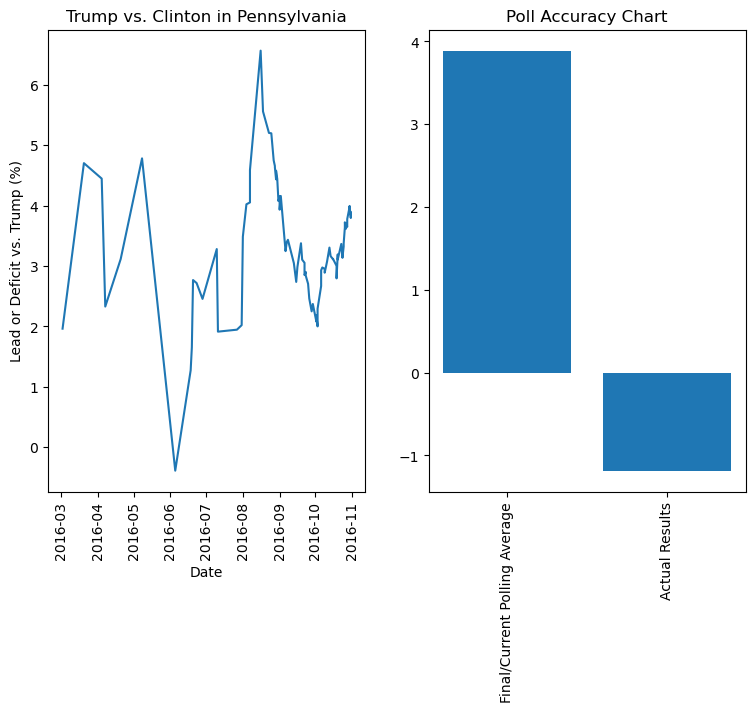

'Percentage Points of Trump Underestimation in Pennsylvania From All Polls: 5.07%'

In [34]:
trump_vs_clinton(trump_clinton,'Pennsylvania',results_2016)

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


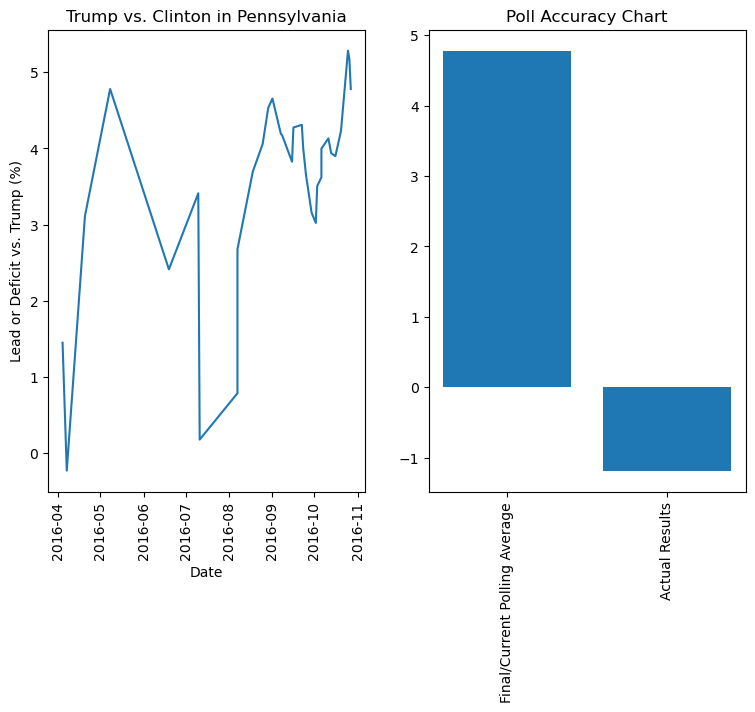

'Percentage Points of Trump Underestimation in Pennsylvania From Historically Reliable Polls: 5.97%'

In [35]:
trump_vs_clinton(trump_clinton,'Pennsylvania',results_2016,reliable=True)

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


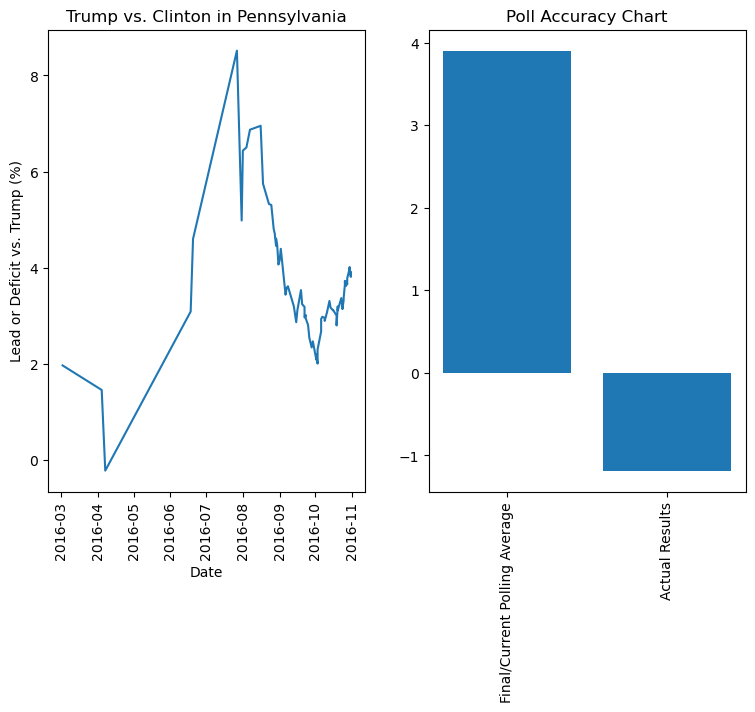

'Percentage Points of Trump Underestimation in Pennsylvania From Polls of Likely Voters: 5.09%'

In [36]:
trump_vs_clinton(trump_clinton,'Pennsylvania',results_2016,likely_voters=True)

* Trump's chances in Pennsylvania were underestimated by huge margins, especially by historically reliable polls, despite Clinton having mostly positive momentum towards the end.

### Ohio

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


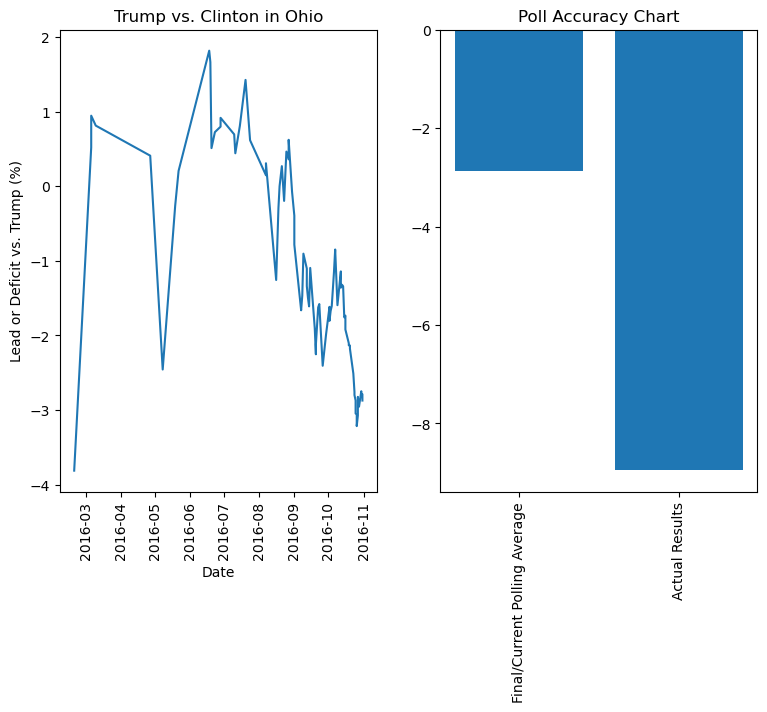

'Percentage Points of Trump Underestimation in Ohio From All Polls: 6.07%'

In [37]:
trump_vs_clinton(trump_clinton,'Ohio',results_2016)

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


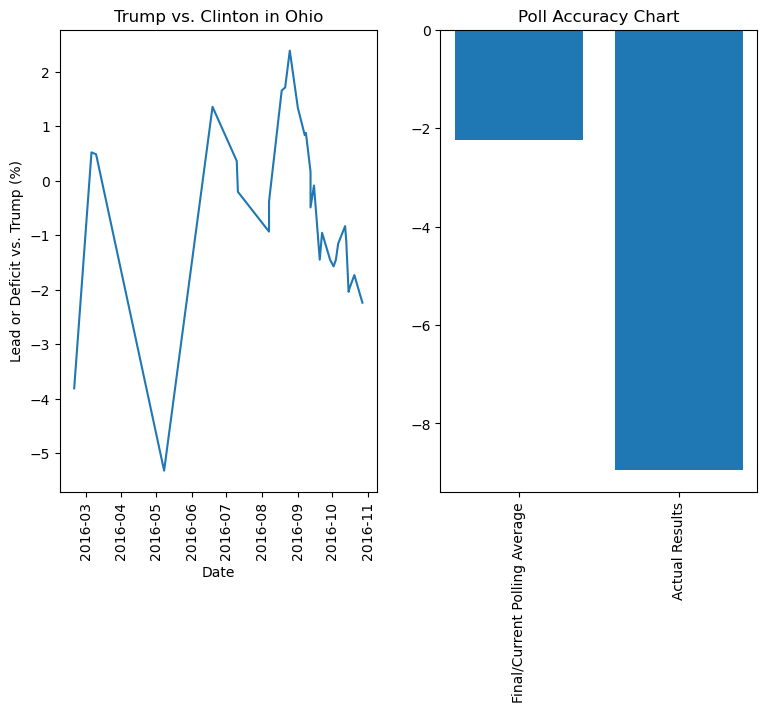

'Percentage Points of Trump Underestimation in Ohio From Historically Reliable Polls: 6.7%'

In [38]:
trump_vs_clinton(trump_clinton,'Ohio',results_2016,reliable=True)

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


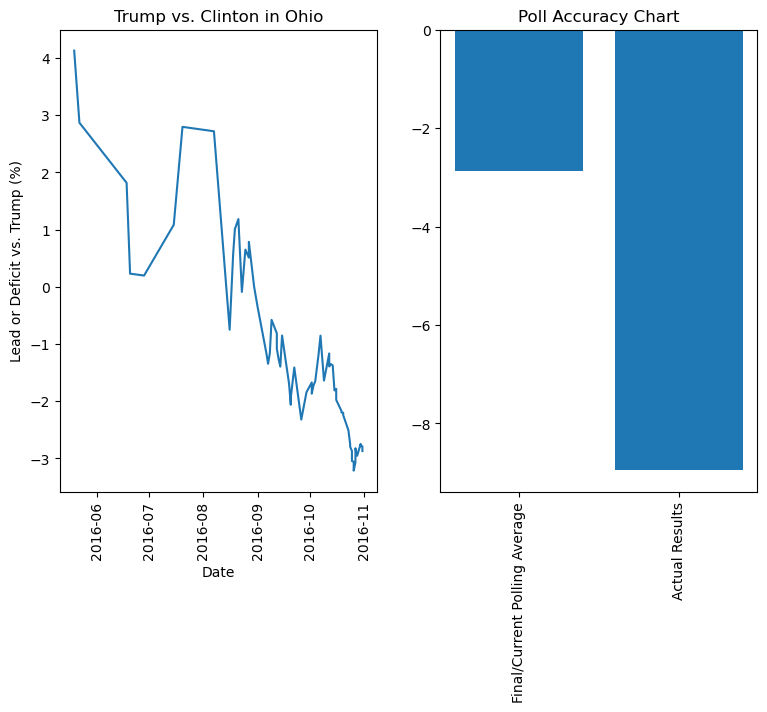

'Percentage Points of Trump Underestimation in Ohio From Polls of Likely Voters: 6.07%'

In [39]:
trump_vs_clinton(trump_clinton,'Ohio',results_2016,likely_voters=True)

* Trump was already projected to win Ohio by a small margin, but he ended up winning by over 8%! Again, the historically reliable polls did the worst job of predictions. We can see, however, that Clinton had a lot of negative momentum towards the end of the Ohio polling.

### Michigan

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


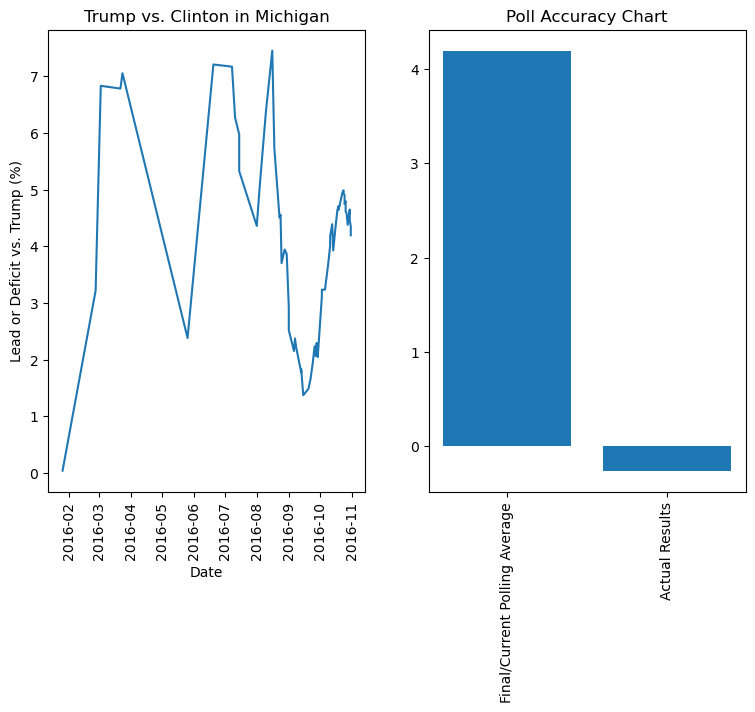

'Percentage Points of Trump Underestimation in Michigan From All Polls: 4.45%'

In [40]:
trump_vs_clinton(trump_clinton,'Michigan',results_2016)

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


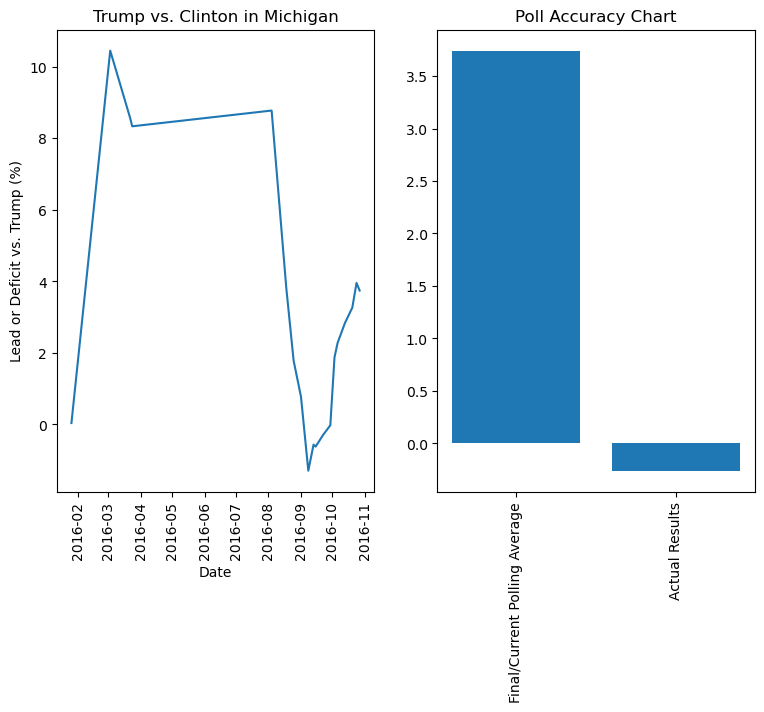

'Percentage Points of Trump Underestimation in Michigan From Historically Reliable Polls: 4.0%'

In [41]:
trump_vs_clinton(trump_clinton,'Michigan',results_2016,reliable=True)

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


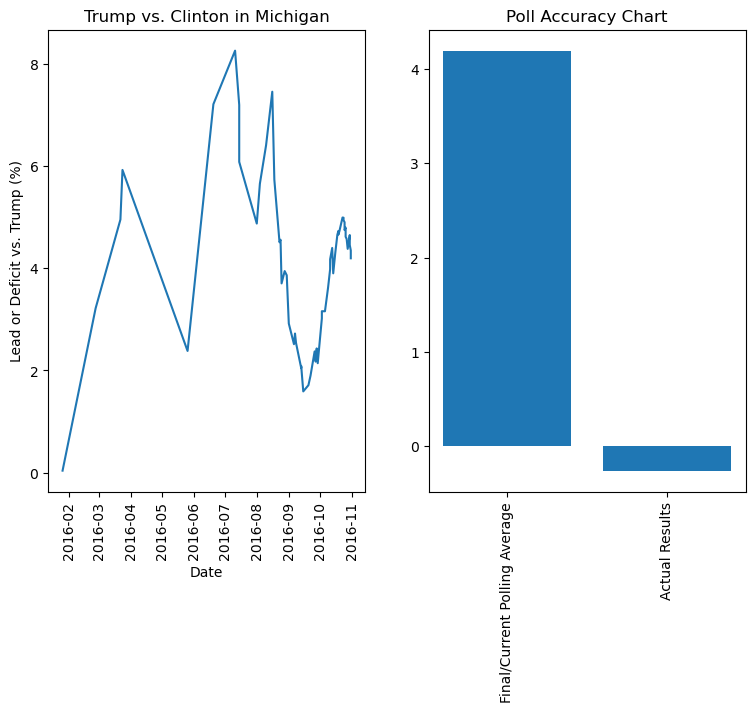

'Percentage Points of Trump Underestimation in Michigan From Polls of Likely Voters: 4.45%'

In [42]:
trump_vs_clinton(trump_clinton,'Michigan',results_2016,likely_voters=True)

* Wisconsin was one of the most unexpected states that Trump won, though the historically reliable polls did much better here that the average of all polls. Interestingly, however, Clinton had positive momentum in the historically reliable polls and negative momentum in polls of likely voters, as well as the average of all polls.

### Minesota

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


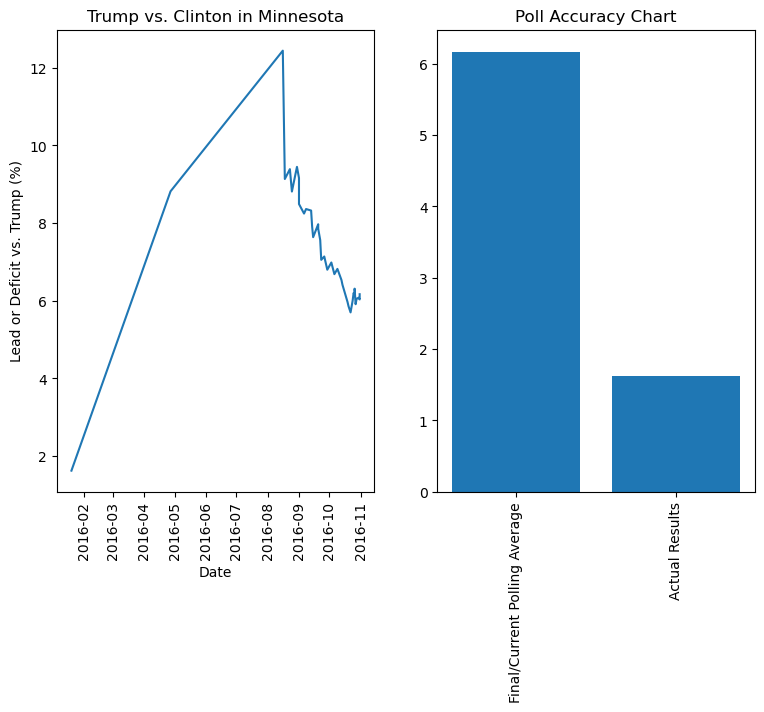

'Percentage Points of Trump Underestimation in Minnesota From All Polls: 4.54%'

In [43]:
trump_vs_clinton(trump_clinton,'Minnesota',results_2016)

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


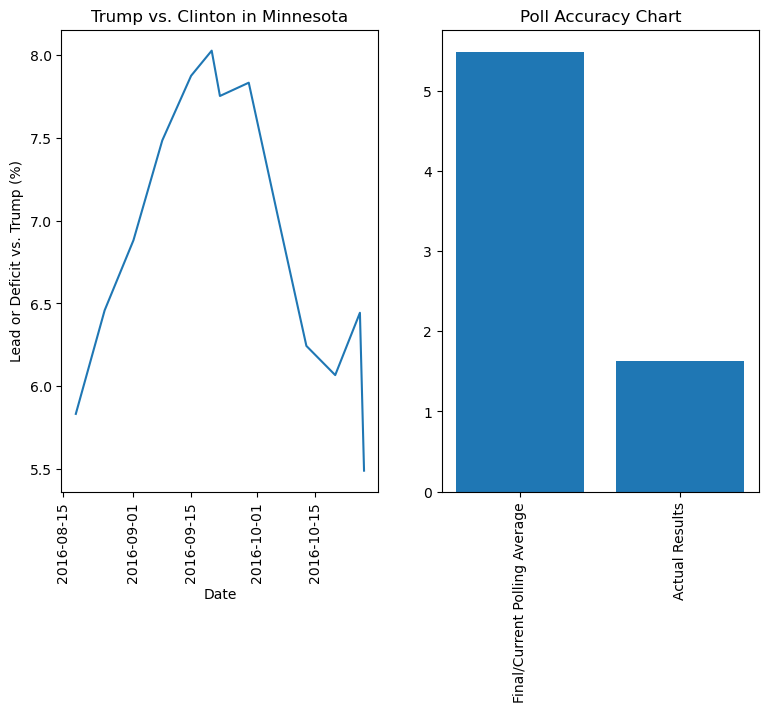

'Percentage Points of Trump Underestimation in Minnesota From Historically Reliable Polls: 3.86%'

In [44]:
trump_vs_clinton(trump_clinton,'Minnesota',results_2016,reliable=True)

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


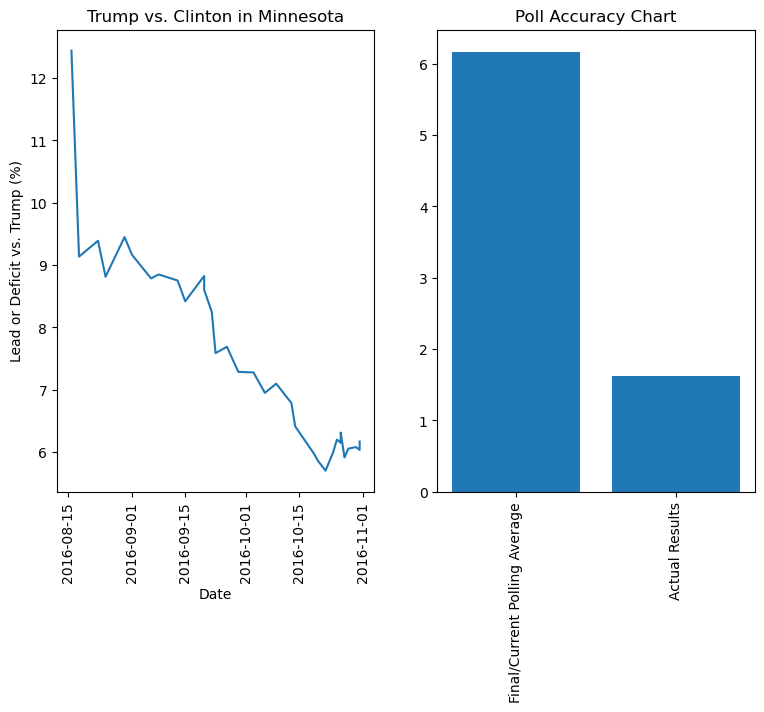

'Percentage Points of Trump Underestimation in Minnesota From Polls of Likely Voters: 4.54%'

In [45]:
trump_vs_clinton(trump_clinton,'Minnesota',results_2016,likely_voters=True)

* Clinton did manage to win Minnesota, but by much closer margins than expected. Again, the historically reliable polls did better here and there was negative momentum for Clinton across the board.


* Since the national polls estimated the results of the popular vote perfectly, yet polls underestimated Trump'schances in battleground states, there must have been some states which overestimated Trump's chances. Note that these states don't play a huge factor in the election because they always decisively vote in a certain direction, so **we have a smaller sample size of polls**. Let's take a look at the polls of the most populated states in the country.

### Calfornia

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


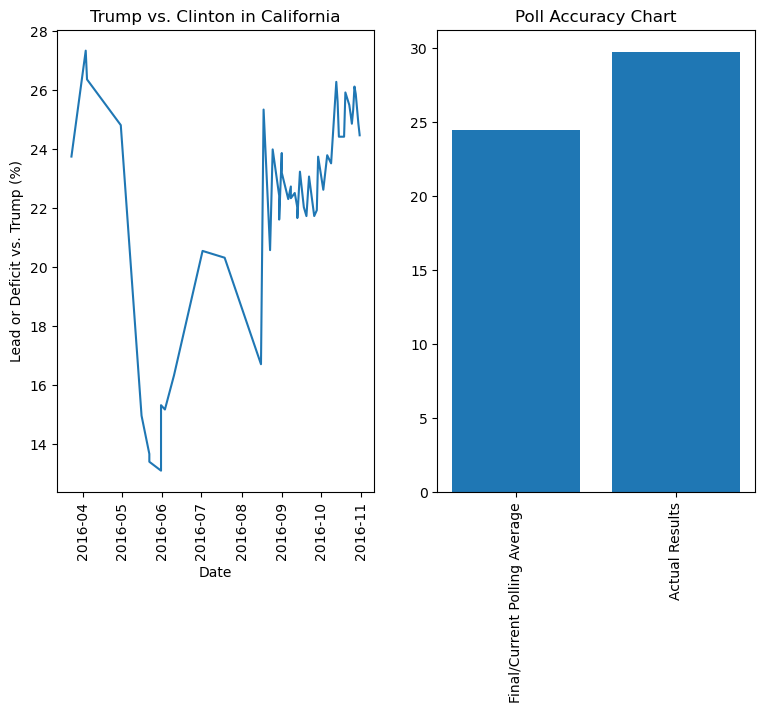

'Percentage Points of Trump Underestimation in California From All Polls: -5.31%'

In [46]:
trump_vs_clinton(trump_clinton, "California", results_2016)

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


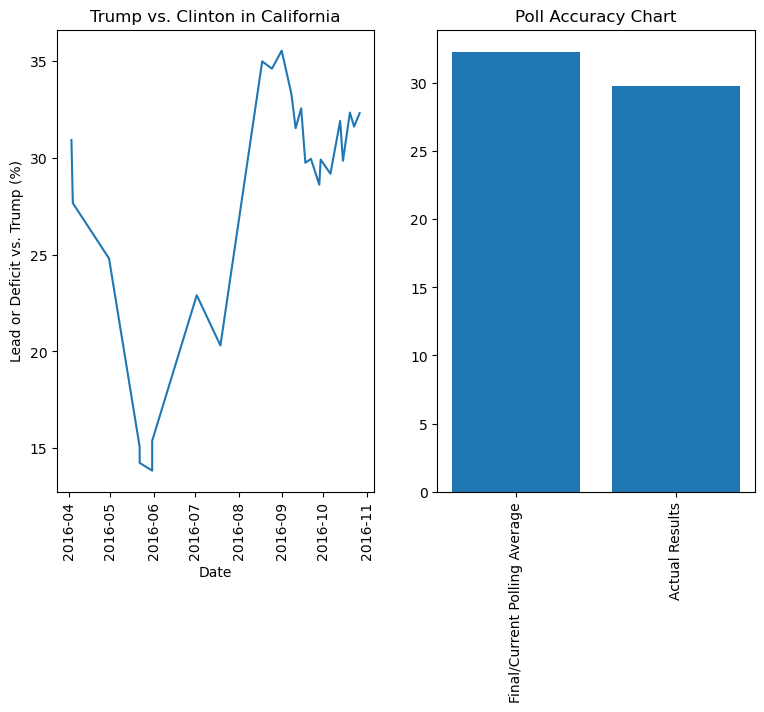

'Percentage Points of Trump Underestimation in California From Historically Reliable Polls: 2.54%'

In [47]:
trump_vs_clinton(trump_clinton, "California", results_2016,reliable=True)

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


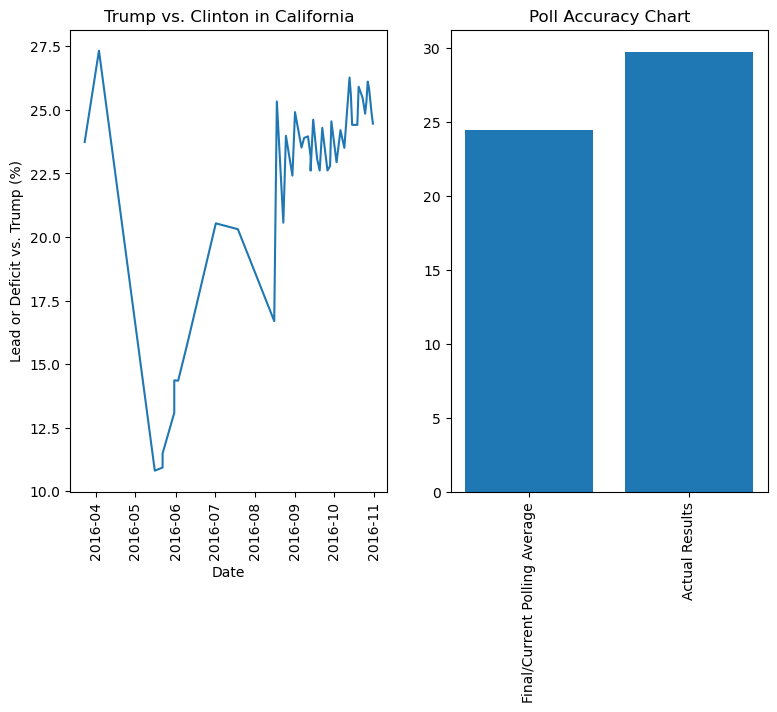

'Percentage Points of Trump Underestimation in California From Polls of Likely Voters: -5.31%'

In [48]:
trump_vs_clinton(trump_clinton, "California", results_2016,likely_voters=True)

* Trump's chances were overestimated in this state by the average of all polls, yet interestingly underestimated by historically reliable polls.

### Illinois

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


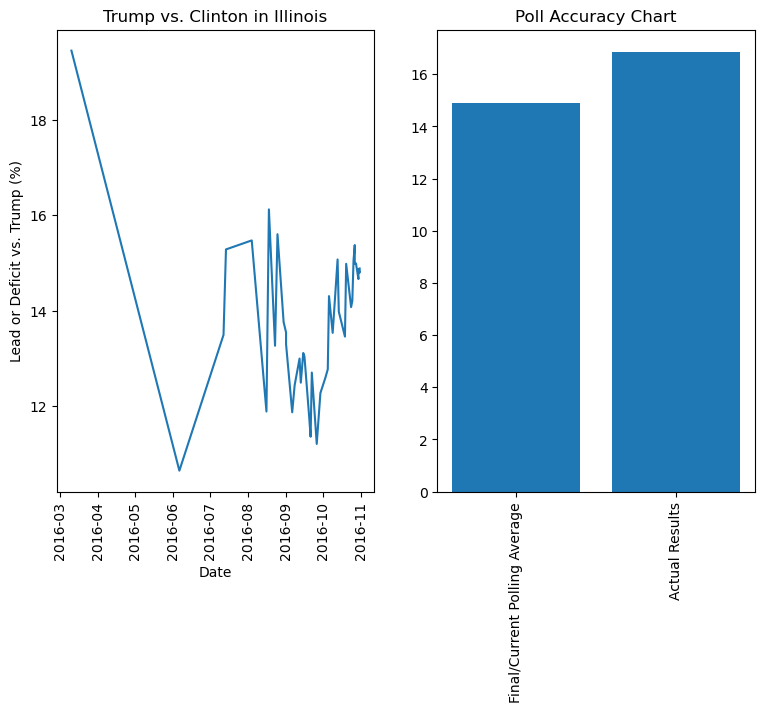

'Percentage Points of Trump Underestimation in Illinois From All Polls: -1.98%'

In [49]:
trump_vs_clinton(trump_clinton,'Illinois',results_2016)

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


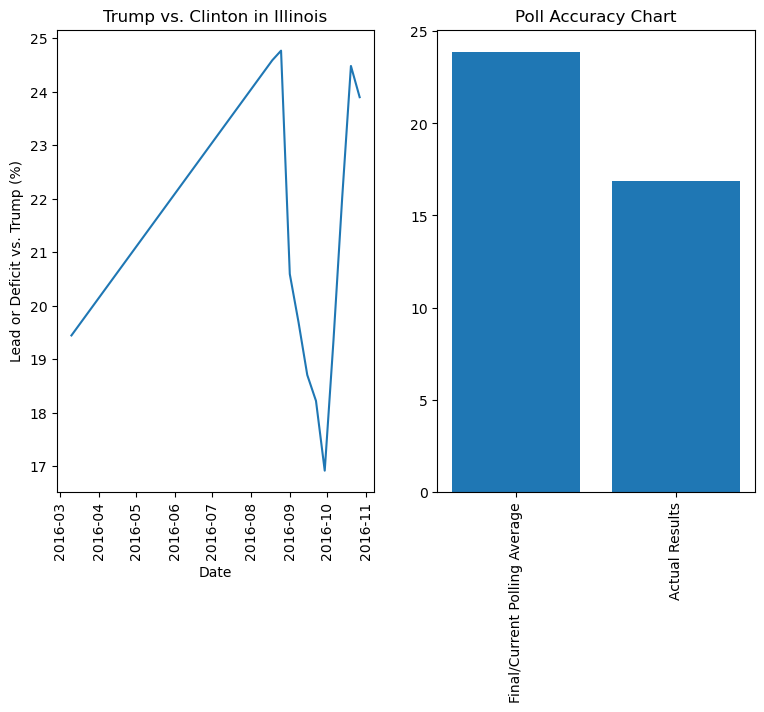

'Percentage Points of Trump Underestimation in Illinois From Historically Reliable Polls: 7.03%'

In [50]:
trump_vs_clinton(trump_clinton,'Illinois',results_2016,reliable=True)

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


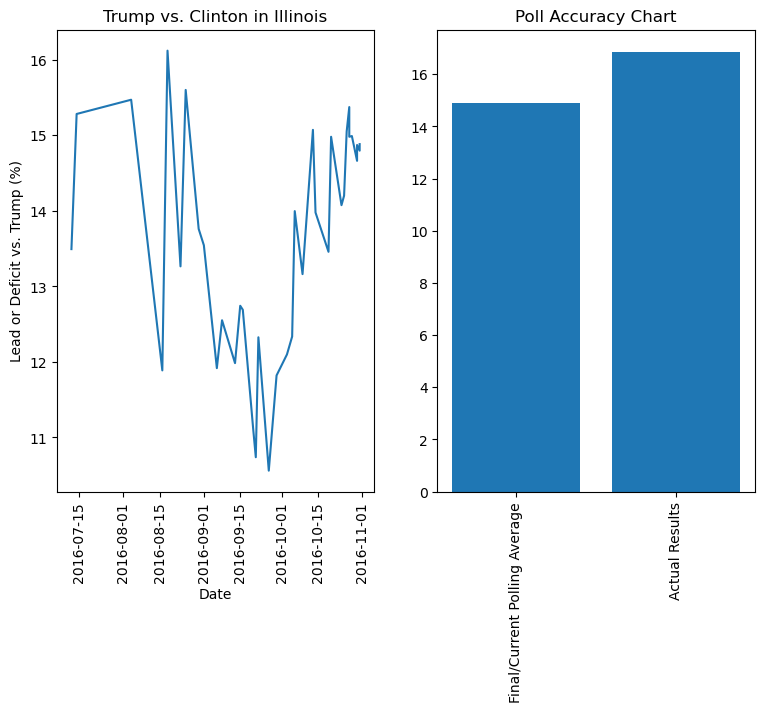

'Percentage Points of Trump Underestimation in Illinois From Polls of Likely Voters: -1.98%'

In [51]:
trump_vs_clinton(trump_clinton,'Illinois',results_2016,likely_voters=True)

* Similar patterns exist here as the California polls. Again, note that the sample size of polls is very small.

### New York

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


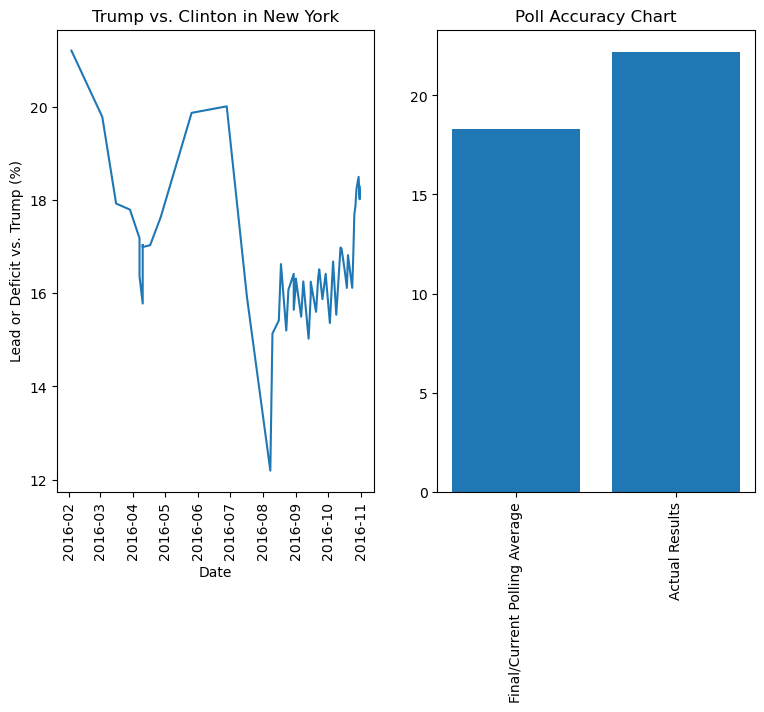

'Percentage Points of Trump Underestimation in New York From All Polls: -3.92%'

In [52]:
trump_vs_clinton(trump_clinton,'New York',results_2016)

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


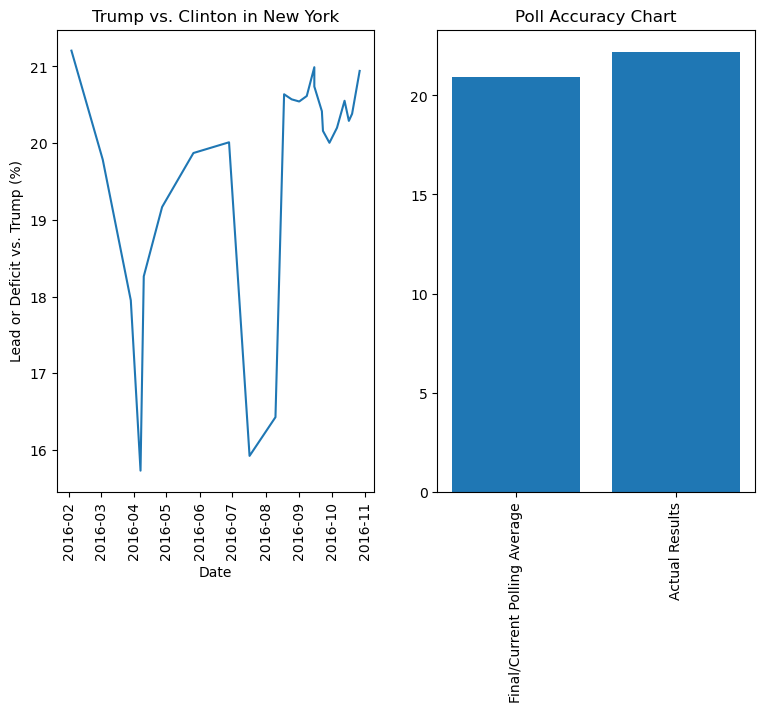

'Percentage Points of Trump Underestimation in New York From Historically Reliable Polls: -1.26%'

In [53]:
trump_vs_clinton(trump_clinton,'New York',results_2016,reliable=True)

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


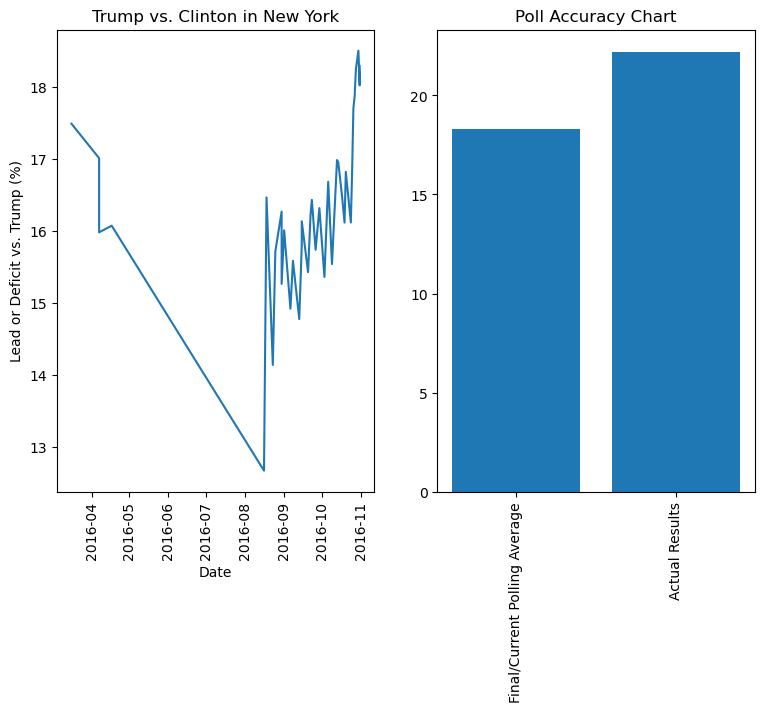

'Percentage Points of Trump Underestimation in New York From Polls of Likely Voters: -3.92%'

In [54]:
trump_vs_clinton(trump_clinton,'New York',results_2016,likely_voters=True)

* Trump was overestimated across the board in New York polls.

### Texas

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


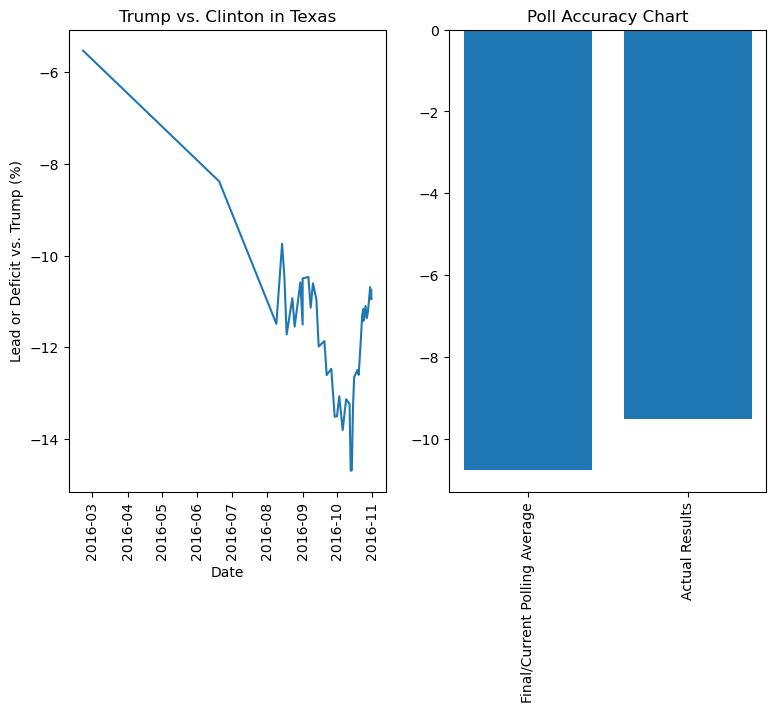

'Percentage Points of Trump Underestimation in Texas From All Polls: -1.24%'

In [55]:
trump_vs_clinton(trump_clinton, "Texas", results_2016)

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


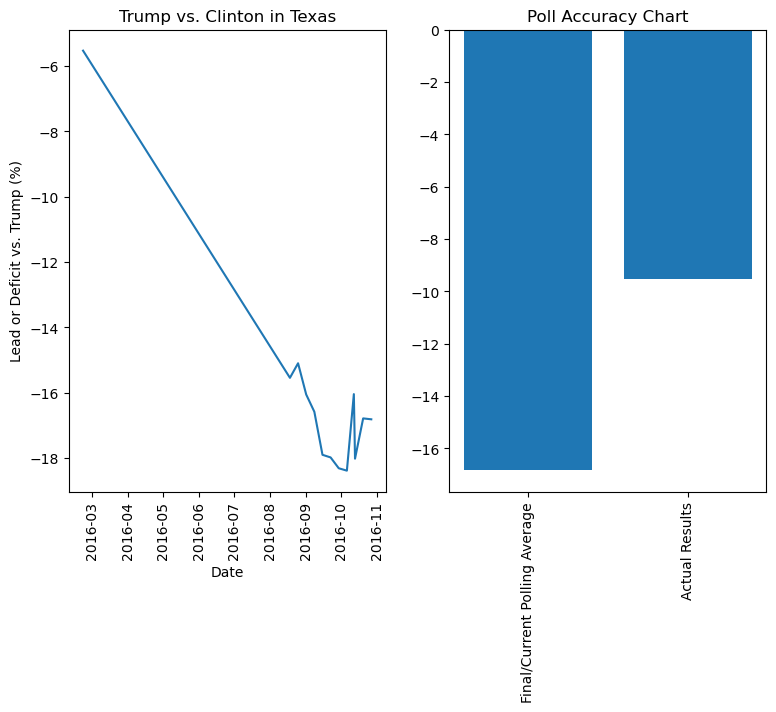

'Percentage Points of Trump Underestimation in Texas From Historically Reliable Polls: -7.29%'

In [56]:
trump_vs_clinton(trump_clinton, "Texas", results_2016,reliable=True)

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_up = match_up.groupby(["end_date", "pollster", "fte_grade", "population"]).mean().reset_index()
C:\Users\binur\AppData\Local\Temp\ipykernel_16488\2654786280.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


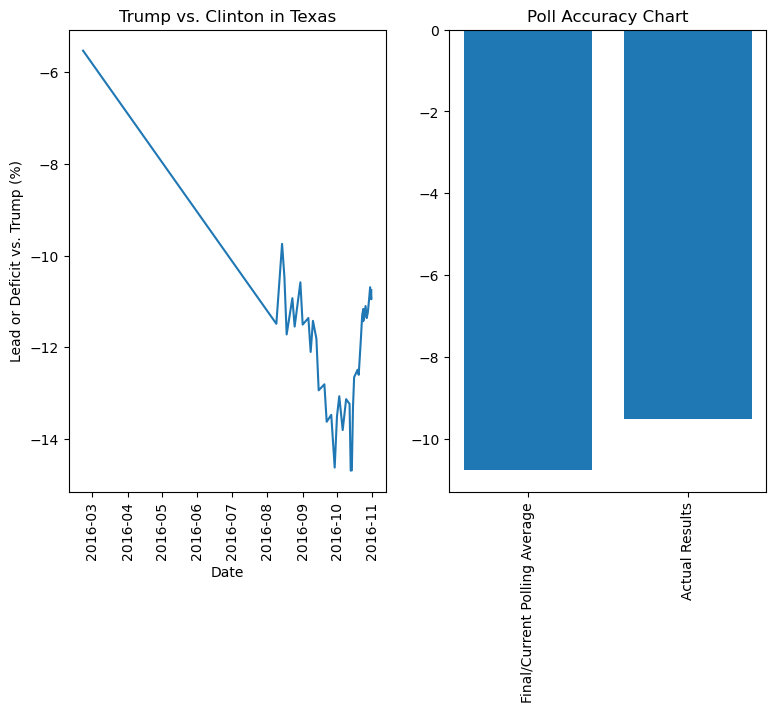

'Percentage Points of Trump Underestimation in Texas From Polls of Likely Voters: -1.24%'

In [57]:
trump_vs_clinton(trump_clinton, "Texas", results_2016,likely_voters=True)

* Though Trump carried Texas pretty easily, he was overestimated by 7.29% in historically reliable polls! Clinton also seemed to pick up positive momentum towards the end of polling in this state.

## What happened in 2016 (The Best Pollsters)

In [58]:
def get_best_pollsters(trump_clinton, state, results_2016):
    
    #Getting polls only from the final two weeks in a given state
    
    final_polls = trump_clinton[(trump_clinton["end_date"] >= "2016-10-17") & (trump_clinton["state"] == state)]
    
    #Getting a variable to represent the true results in each state
    
    final_polls = pd.merge(final_polls, results_2016, on = "state", how = "inner")
    
    #Getting the average results in the state for each pollster and the difference from actual results
    
    by_pollster = final_polls.groupby(["pollster", "dem_lead_y"]).mean().reset_index()[["pollster", "dem_lead_x", "dem_lead_y"]]
    by_pollster["trump_underestimation"] = by_pollster["dem_lead_x"] - by_pollster["dem_lead_y"]
    graph_pollsters = by_pollster.sort_values("trump_underestimation", ascending = False)
    
    #Getting the number of polls from each pollster
    
    num_polls = final_polls.groupby("pollster").size().reset_index()
    
    #Finally, plotting our results
    
    plt.subplots(figsize = (10,10))
    sns.barplot(x = graph_pollsters["trump_underestimation"], y = graph_pollsters["pollster"])
    plt.xlabel("Percentage Point Difference From Actual Result (more positive number = more Trump underestimation)")
    plt.ylabel(None)
    plt.show()
    
    #Table of most to least accurate pollsters in terms of magnitude of inaccuracy
    
    best_pollsters = by_pollster
    best_pollsters["trump_underestimation"] = abs(by_pollster["dem_lead_x"] - by_pollster["dem_lead_y"])
    best_pollsters = pd.merge(best_pollsters, num_polls, on = "pollster") 
    best_pollsters["Number of Polls"] = best_pollsters[0]
    best_pollsters["Pct Pts Inaccuracy"] = best_pollsters["trump_underestimation"]
    best_pollsters["Pollster"] = best_pollsters["pollster"]
    best_pollsters = best_pollsters.sort_values("trump_underestimation")[["Pollster", "Pct Pts Inaccuracy", "Number of Polls"]]
    
    #Linear Regression of polls released the final two weeks vs final inaccuracy
    
    sns.lmplot(data = best_pollsters, x = "Number of Polls", y = "Pct Pts Inaccuracy")
    plt.title(f"Number of Polls Released vs. Inaccuracy in {state}")
    print(stats.linregress(best_pollsters["Number of Polls"], best_pollsters["Pct Pts Inaccuracy"]))

### Nationally

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\1033544296.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_pollster = final_polls.groupby(["pollster", "dem_lead_y"]).mean().reset_index()[["pollster", "dem_lead_x", "dem_lead_y"]]


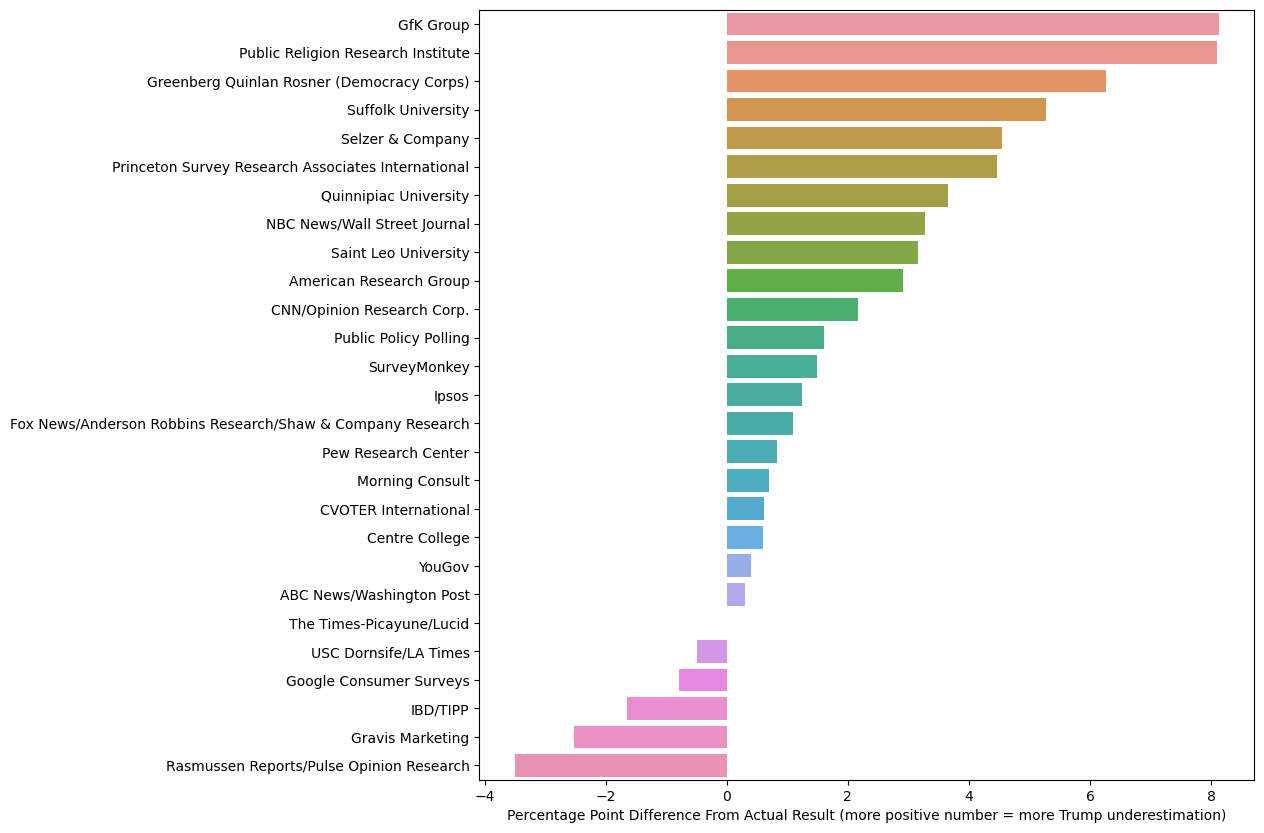

LinregressResult(slope=-0.06573106522415248, intercept=3.4397676170227, rvalue=-0.44274476469205826, pvalue=0.020738758210948567, stderr=0.026623740019566394, intercept_stderr=0.5331399784150631)


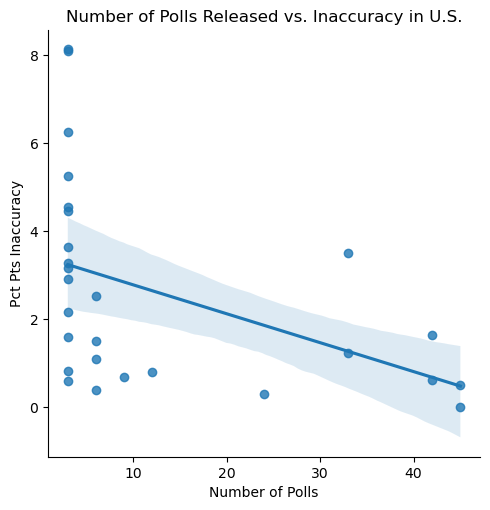

In [59]:
get_best_pollsters(trump_clinton,'U.S.',results_2016)

* The Times-Picayune/Lucid, which was tied for releasing the most polls in the final two weeks leading up to the election, got an average that predicted the exact popular vote.


* There existed a moderate correlation between number of polls released the final two weeks before the election and inaccuracy (r = -0.44). The probability that this occurred by chance is 2.07% (p = 0.0207).

### Florida

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\1033544296.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_pollster = final_polls.groupby(["pollster", "dem_lead_y"]).mean().reset_index()[["pollster", "dem_lead_x", "dem_lead_y"]]


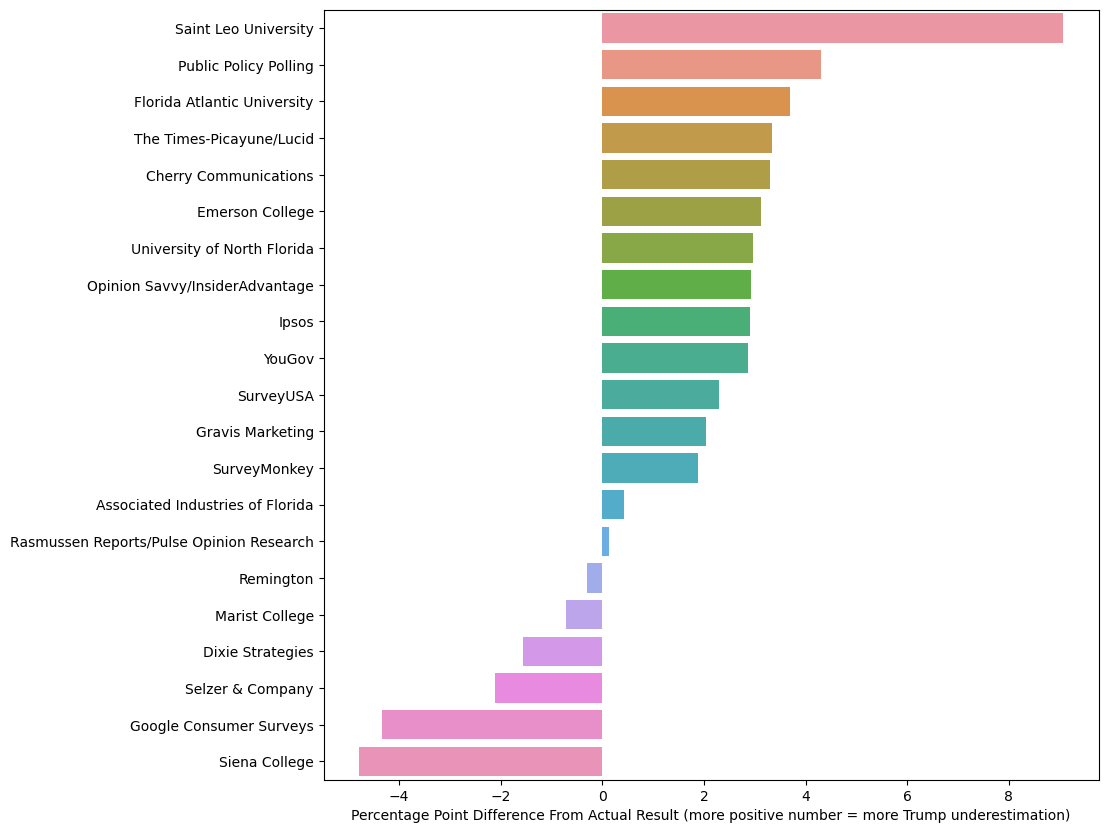

LinregressResult(slope=-0.1314797869898999, intercept=3.469762870475612, rvalue=-0.3146283867304236, pvalue=0.16480262845076038, stderr=0.09100156207579224, intercept_stderr=0.6162434885631306)


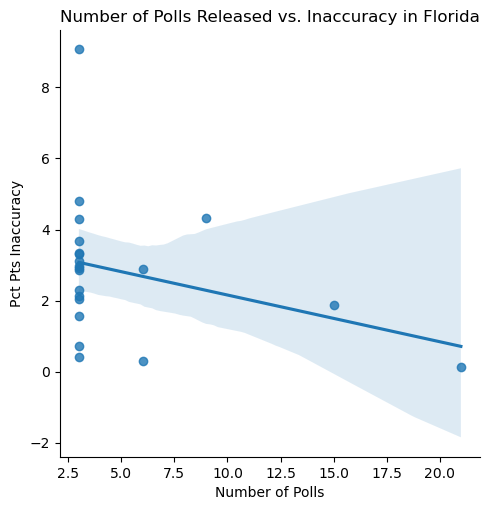

In [60]:
get_best_pollsters(trump_clinton,'Florida',results_2016)

* Rasumussen predicted the Florida results very precisely, and released more polls than any other pollster. We can also see a balance of Trump underestimation and overestimation, which makes sense due to our findings in Florida from before. Also, it would be best to never listen to Saint Leo's polling!


* There existed a moderate correlation between number of polls released the final two weeks before the election and inaccuracy (r = -0.31). The probability that this occurred by chance is 16.5%

### Pennsylvania

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\1033544296.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_pollster = final_polls.groupby(["pollster", "dem_lead_y"]).mean().reset_index()[["pollster", "dem_lead_x", "dem_lead_y"]]


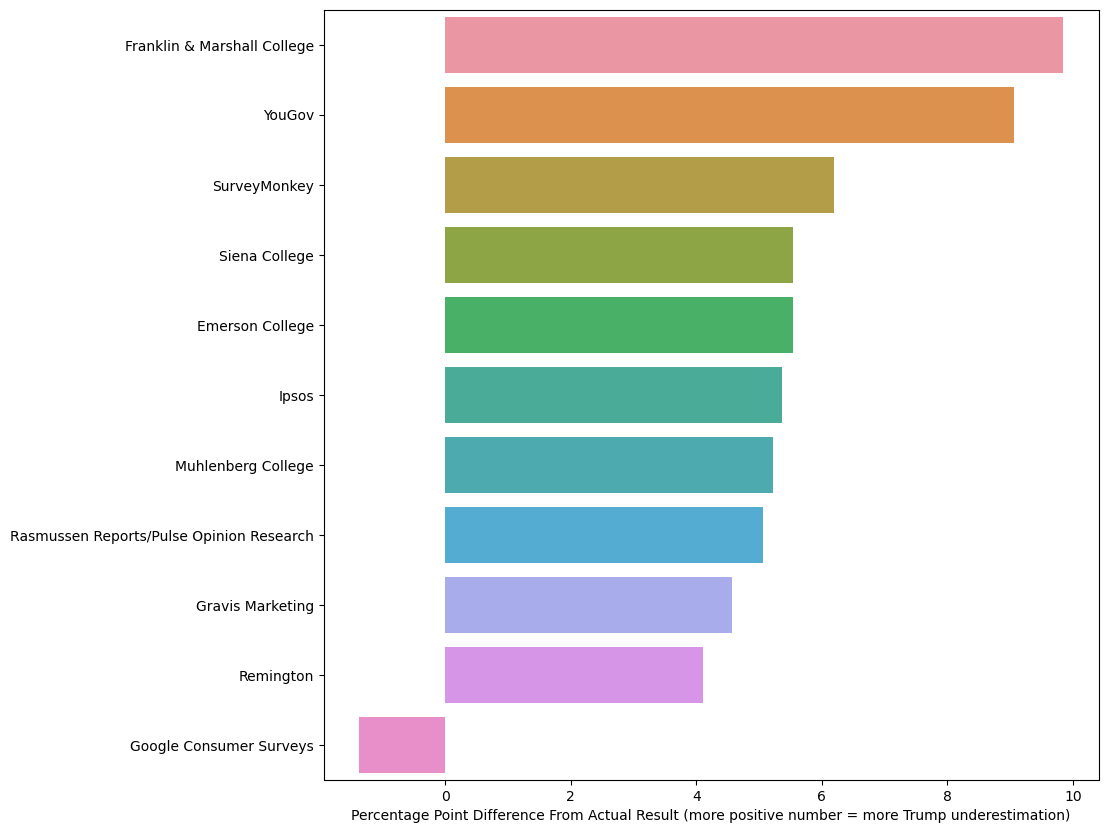

LinregressResult(slope=-0.09912998505143893, intercept=6.327558125163657, rvalue=-0.25612728894510434, pvalue=0.447127844728024, stderr=0.12470793046078664, intercept_stderr=1.128025673782261)


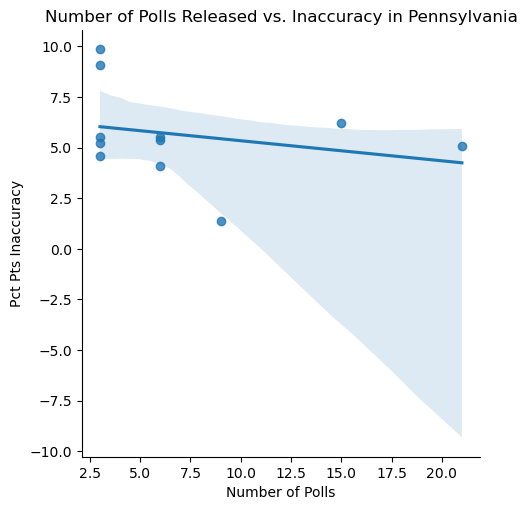

In [61]:
get_best_pollsters(trump_clinton, "Pennsylvania", results_2016)

* There existed a small correlation between number of polls released the final two weeks before the election and inaccuracy (r = -0.26). The probability that this occurred by chance is 44.7%.

### Ohio

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\1033544296.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_pollster = final_polls.groupby(["pollster", "dem_lead_y"]).mean().reset_index()[["pollster", "dem_lead_x", "dem_lead_y"]]


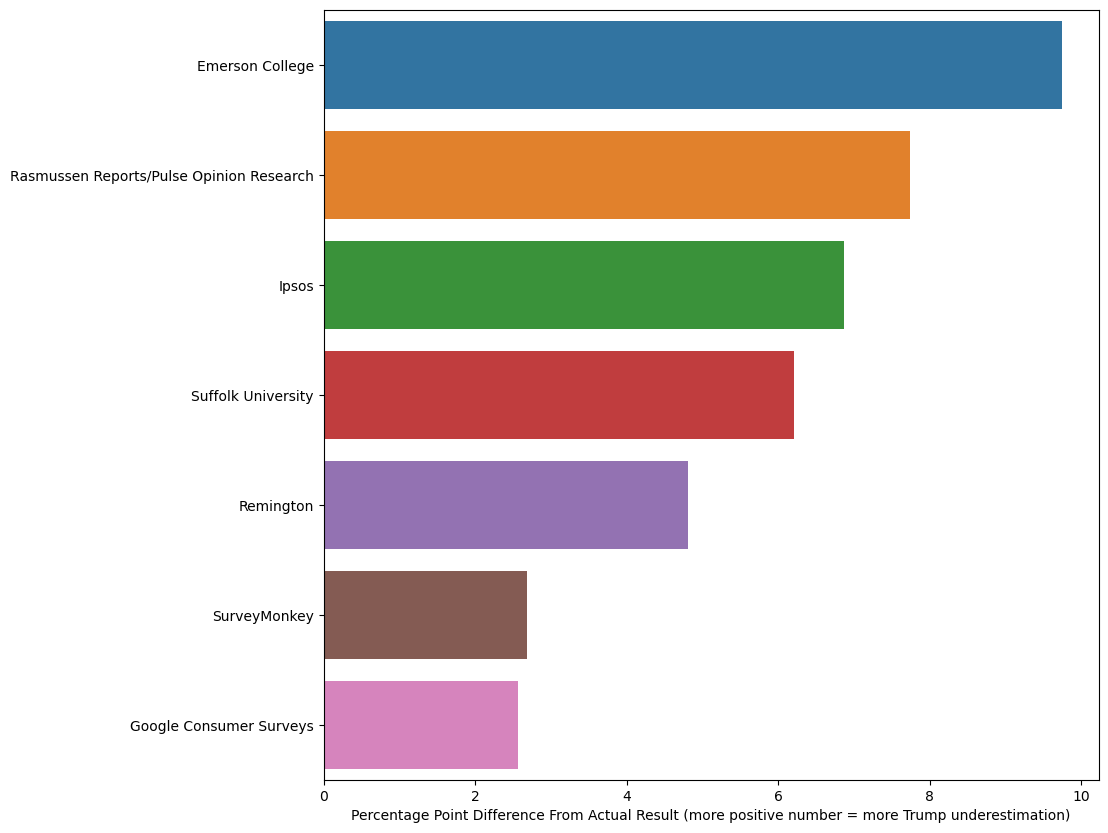

LinregressResult(slope=-0.08017725291005304, intercept=6.523640526235359, rvalue=-0.20400494703097888, pvalue=0.6608320049705139, stderr=0.17206589226208574, intercept_stderr=1.8815185303865682)


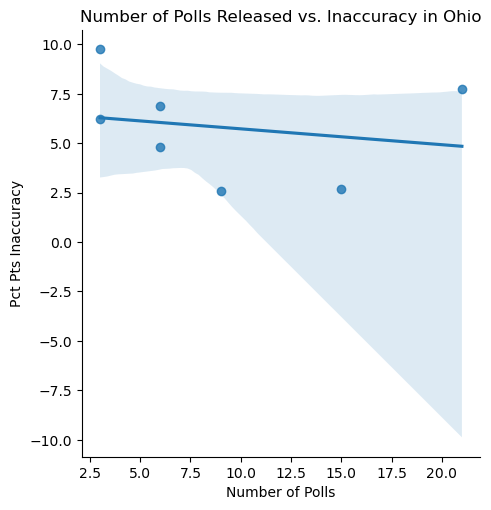

In [62]:
get_best_pollsters(trump_clinton, "Ohio", results_2016)

* Again, Google Consumer Surveys gave the best prediction for Ohio, though SurveyMonkey was a very close second.


* There existed a small correlation between number of polls released the final two weeks before the election and inaccuracy (r = -0.20). The probability that this occurred by chance is 66.1%

### Michigan

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\1033544296.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_pollster = final_polls.groupby(["pollster", "dem_lead_y"]).mean().reset_index()[["pollster", "dem_lead_x", "dem_lead_y"]]


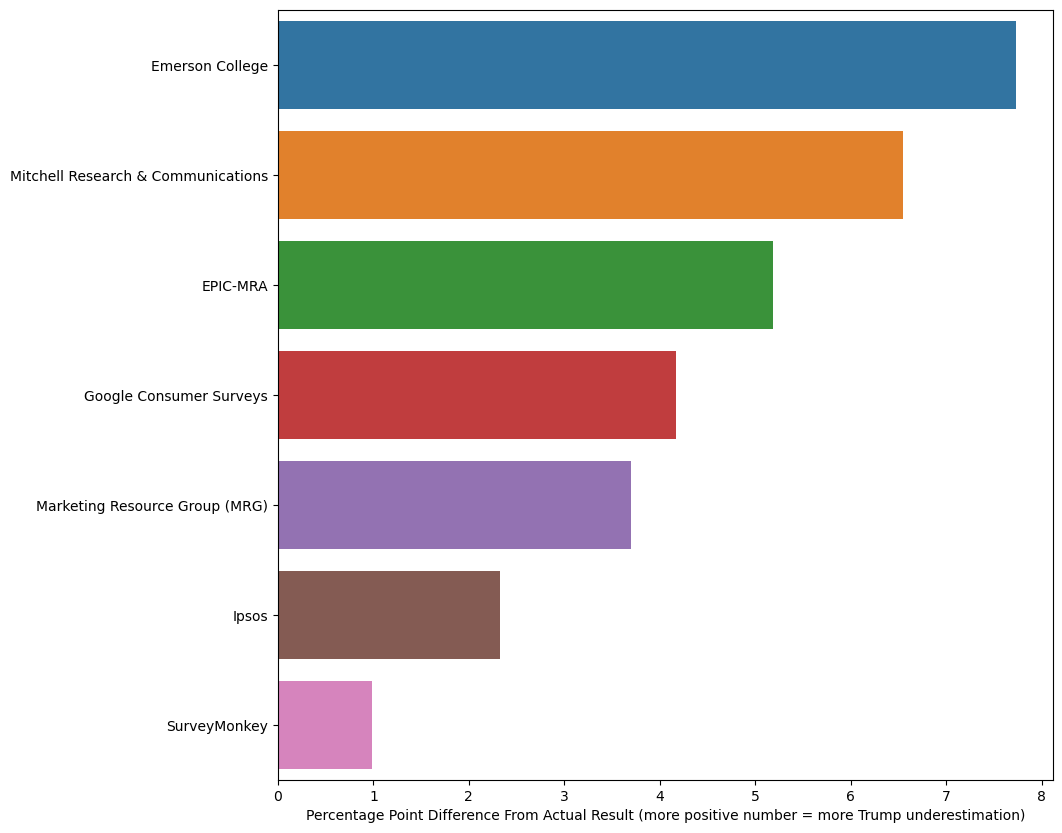

LinregressResult(slope=-0.2019419262626261, intercept=5.849446780817999, rvalue=-0.41948091378667834, pvalue=0.3488317294927317, stderr=0.19543498832070566, intercept_stderr=1.6730617860905737)


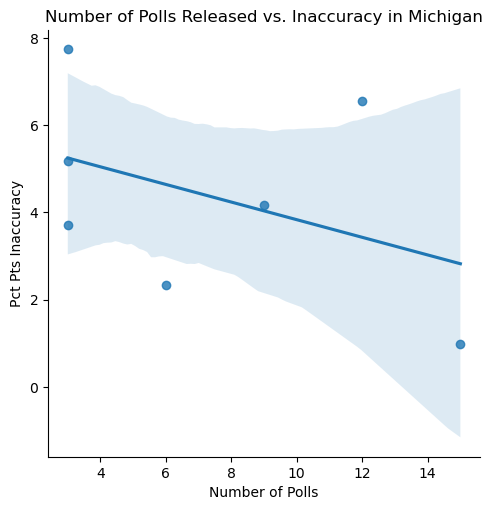

In [63]:
get_best_pollsters(trump_clinton, "Michigan", results_2016)

* Another state where every pollster underestimated Trump's chances, though SurveyMonkey was very close.


* There existed a moderate correlation between number of polls released the final two weeks before the election and inaccuracy (r = -0.42). The probability that this occurred by chance is 34.5%

### Wisconsin

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\1033544296.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_pollster = final_polls.groupby(["pollster", "dem_lead_y"]).mean().reset_index()[["pollster", "dem_lead_x", "dem_lead_y"]]


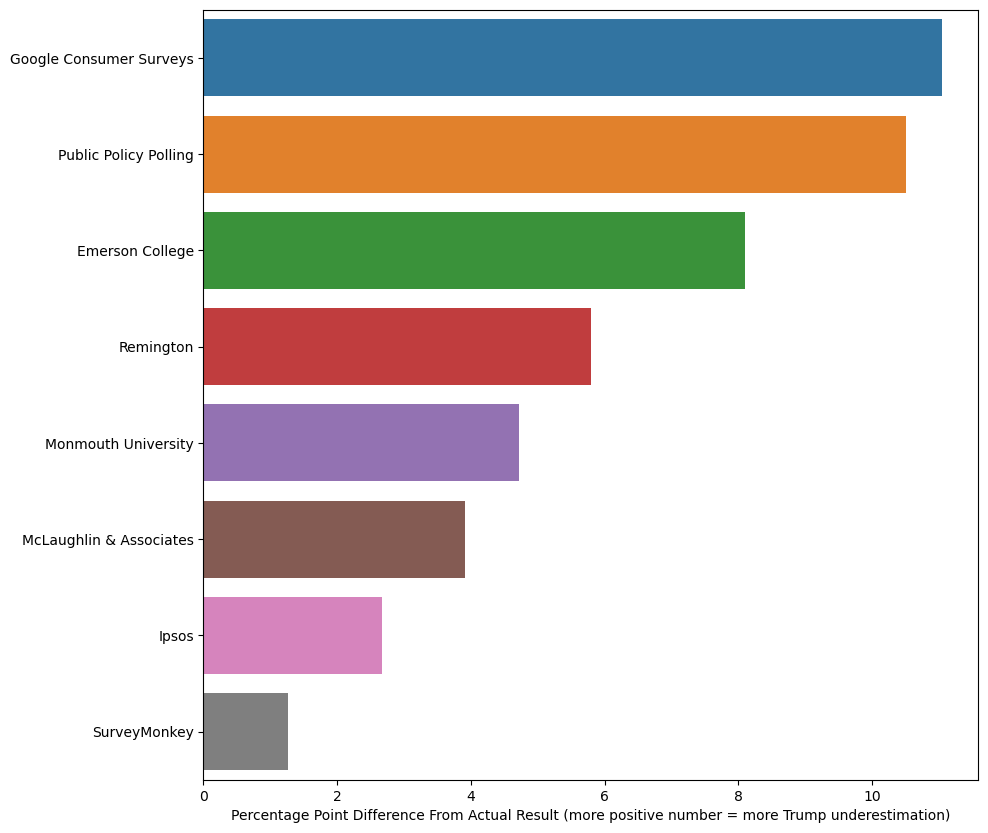

LinregressResult(slope=-0.29551322222222226, intercept=7.773837035240289, rvalue=-0.35037889678811396, pvalue=0.39482730839639757, stderr=0.3224936999037691, intercept_stderr=2.319938178102372)


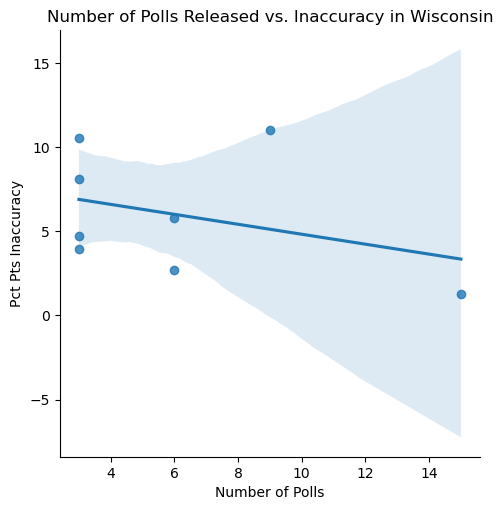

In [64]:
get_best_pollsters(trump_clinton, "Wisconsin", results_2016)

* This time, Google Consumer Surveys was way off and SurveyMonkey was right on the money as they also performed the most polls.


* There existed a moderate correlation between number of polls released the final two weeks before the election and inaccuracy (r = -0.35). The probability that this occurred by chance is 39.4%.

### Minnesota

C:\Users\binur\AppData\Local\Temp\ipykernel_16488\1033544296.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_pollster = final_polls.groupby(["pollster", "dem_lead_y"]).mean().reset_index()[["pollster", "dem_lead_x", "dem_lead_y"]]


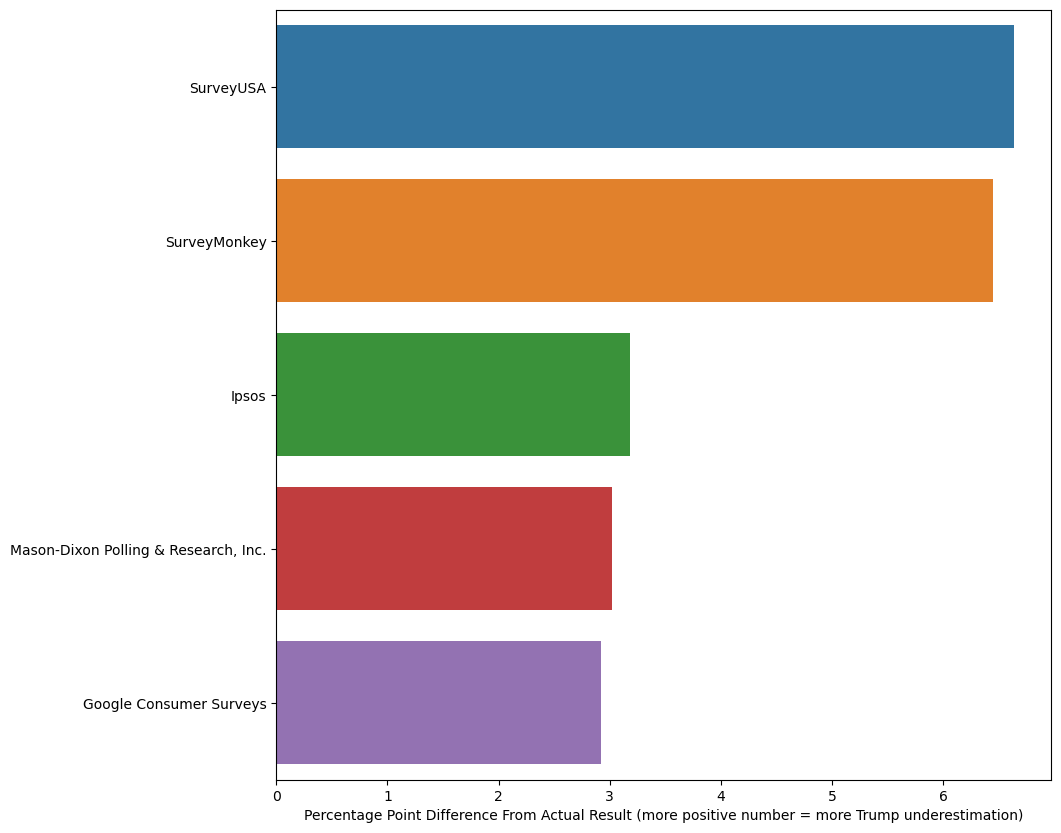

LinregressResult(slope=0.1108027658730161, intercept=3.644336476860368, rvalue=0.2895593646222629, pvalue=0.6365403351291179, stderr=0.21146423515231544, intercept_stderr=1.7943335358555472)


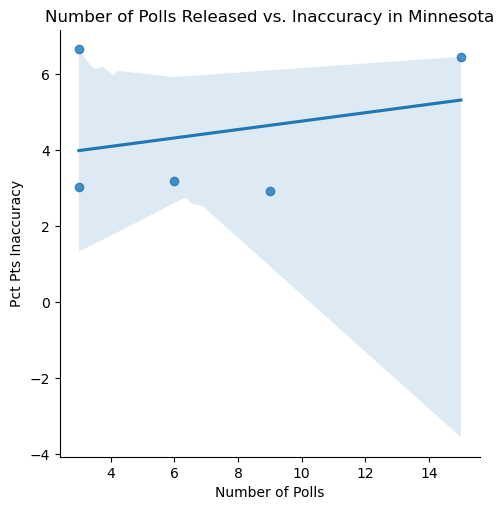

In [65]:
get_best_pollsters(trump_clinton, "Minnesota", results_2016)

* Another good prediction by Google Consumer Surveys. There existed a small positive correlation between number of polls released the final two weeks before theelection and inaccuracy (r = 0.29). The probability that this occurred by chance is 63.6%.